#Attribute explained and visualized<br>
1. Age: The age of the patient in years.<br>
2. Sex: The gender of the patient. (0 = female, 1 = male)<br>
3. Chest Pain Type (cp): The type of chest pain experienced by the patient. It's categorized into four types: ** <<loại đau ngực - tăng dần từ 0-3>>**<br>
0: Typical angina<br>
1: Atypical angina<br>
2: Non-anginal pain<br>
3: Asymptomatic<br>
4. Resting Blood Pressure (trestbps) ** <<huyết áp - càng cao càng có nguy cơ mắc bệnh tim>>**: The resting blood pressure of the patient measured in mm Hg (millimeters of mercury) upon admission to the hospital.<br>
5. Cholesterol (chol) ** <<càng cao càng có nguy cơ mắc bệnh tim - vì dataset mặc định > 100 >>**: Serum cholesterol level of the patient measured in mg/dl (milligrams per deciliter).<br>
6. Fasting Blood Sugar (fbs) ** <<đường huyết - glucose máu 0 - bt, 1 - tăng>> **: Fasting blood sugar level of the patient. (0 = blood sugar < 120 mg/dl, 1 = blood sugar > 120 mg/dl)<br>
7. Resting Electrocardiographic Results (restecg)** << kết quả điện tâm đồ khi nghỉ ngơi <hình bên dưới - bình thường> -- 0 -BT, 1 - bất thường, 2 - tỷ lệ cao bị suy tim >> **: Result of the resting electrocardiogram (ECG) of the patient. It's categorized into three types:<br>
0: Normal<br>
1: Abnormality in ST-T wave (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. Maximum Heart Rate Achieved (thalach) ** <<nhịp tim cao nhất khi vận động mạnh - nhịp tim- được tính bằng số ô trong RR-interval * 0.04  - thường sẽ là cao, nếu thấp thì có nguy cơ bị bệnh tim - trừ vận động viên có nhịp tim thấp hơn bth>> **: The maximum heart rate achieved by the patient during exercise.<br>
9. Exercise Induced Angina (exang)** << có đau ngực khi vận động hay ko>> **: Whether the patient experienced <br>exercise-induced angina. (0 = no, 1 = yes)<br>
10. ST Depression Induced by Exercise Relative to Rest (oldpeak): ST depression induced by exercise relative to rest. It indicates the degree of abnormality in electrocardiograms during exercise. ** << ST chênh xuống do tập thể dục gây ra so với nghỉ ngơi (oldpeak):  Nó cho biết mức độ bất thường của điện tâm đồ trong quá trình tập luyện. mô tả bởi sóng - gias trị càng cao thì càng dễ bị bệnh tim >> ** <br>
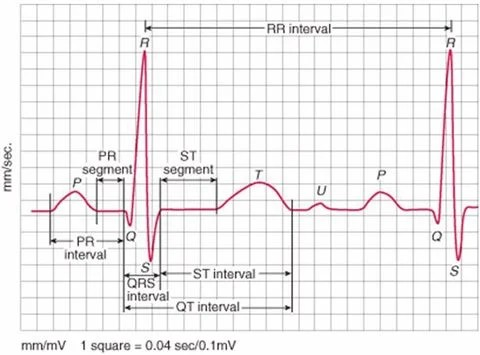
<br>
11. Slope of the Peak Exercise ST Segment (slope)** << 1 - ko thay đổi là tốt nhất, 0 và 2 đều là ko tốt >> **: The slope of the peak exercise ST segment. It's categorized into three types:<br>
0: Upsloping<br>
1: Flat<br>
2: Downsloping<br>
12. Number of Major Vessels Colored by Fluoroscopy (ca): The number of major vessels (0-3) colored by fluoroscopy. These vessels typically refer to the major arteries of the heart. ** << số nhánh chính động mạch vành có hình ảnh trên phim chụp - bình thường sẽ là 3, khi mạch chèn ép hoặc bịp hẹp, máu sẽ không tới đủ để hiện lên hình ảnh >> **
<br>

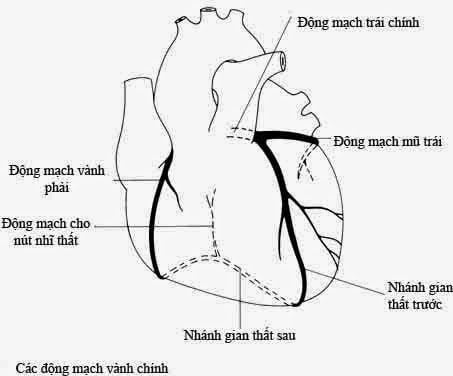
<br>
13. Thalassemia (thal): A blood disorder affecting the amount of oxygen carried by the blood. It's categorized into three types: ** << bệnh tan máu bẩm sinh - khi mắc bệnh tan máu, lượng oxi trong hồng cầu của bệnh nhân suy giảm, dẫn đến các chức năng của các cơ quan trong cơ thể không được dảm bảo, trong đó có tim - nơi diễn ra các hoạt động co bóp không ngừng nghỉ  >>**<br>
1: Normal<br>
2: Fixed defect<br>
3: Reversible defect<br>
11. Target: The presence of heart disease. (0 = no heart disease, 1 = heart disease)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
patients_with_heart_disease_age_lt_50 = df[(df['age'] < 50) & (df['target'] == 1)]

num_patients_with_heart_disease_age_lt_50 = len(patients_with_heart_disease_age_lt_50)

print("Number of patients with heart disease and age less than 50:", num_patients_with_heart_disease_age_lt_50)
patients_with_heart_disease_age_gt_50 = df[(df['age'] > 50) & (df['target'] == 1)]

num_patients_with_heart_disease_age_gt_50 = len(patients_with_heart_disease_age_gt_50)

print("Number of patients with heart disease and age greater than 50:", num_patients_with_heart_disease_age_gt_50)

male_with_heart_disease = df[(df['sex'] == 1) & (df['target'] == 1)]
female_with_heart_disease = df[(df['sex'] == 0) & (df['target'] == 1)]
percentage_male_with_heart_disease = len(male_with_heart_disease) / len(df[df['sex'] == 1]) * 100
percentage_female_with_heart_disease = len(female_with_heart_disease) / len(df[df['sex'] == 0]) * 100

print("Percentage of male patients with heart disease:", percentage_male_with_heart_disease)
print("Percentage of female patients with heart disease:", percentage_female_with_heart_disease)



Number of patients with heart disease and age less than 50: 199
Number of patients with heart disease and age greater than 50: 315
Percentage of male patients with heart disease: 42.07573632538569
Percentage of female patients with heart disease: 72.43589743589743


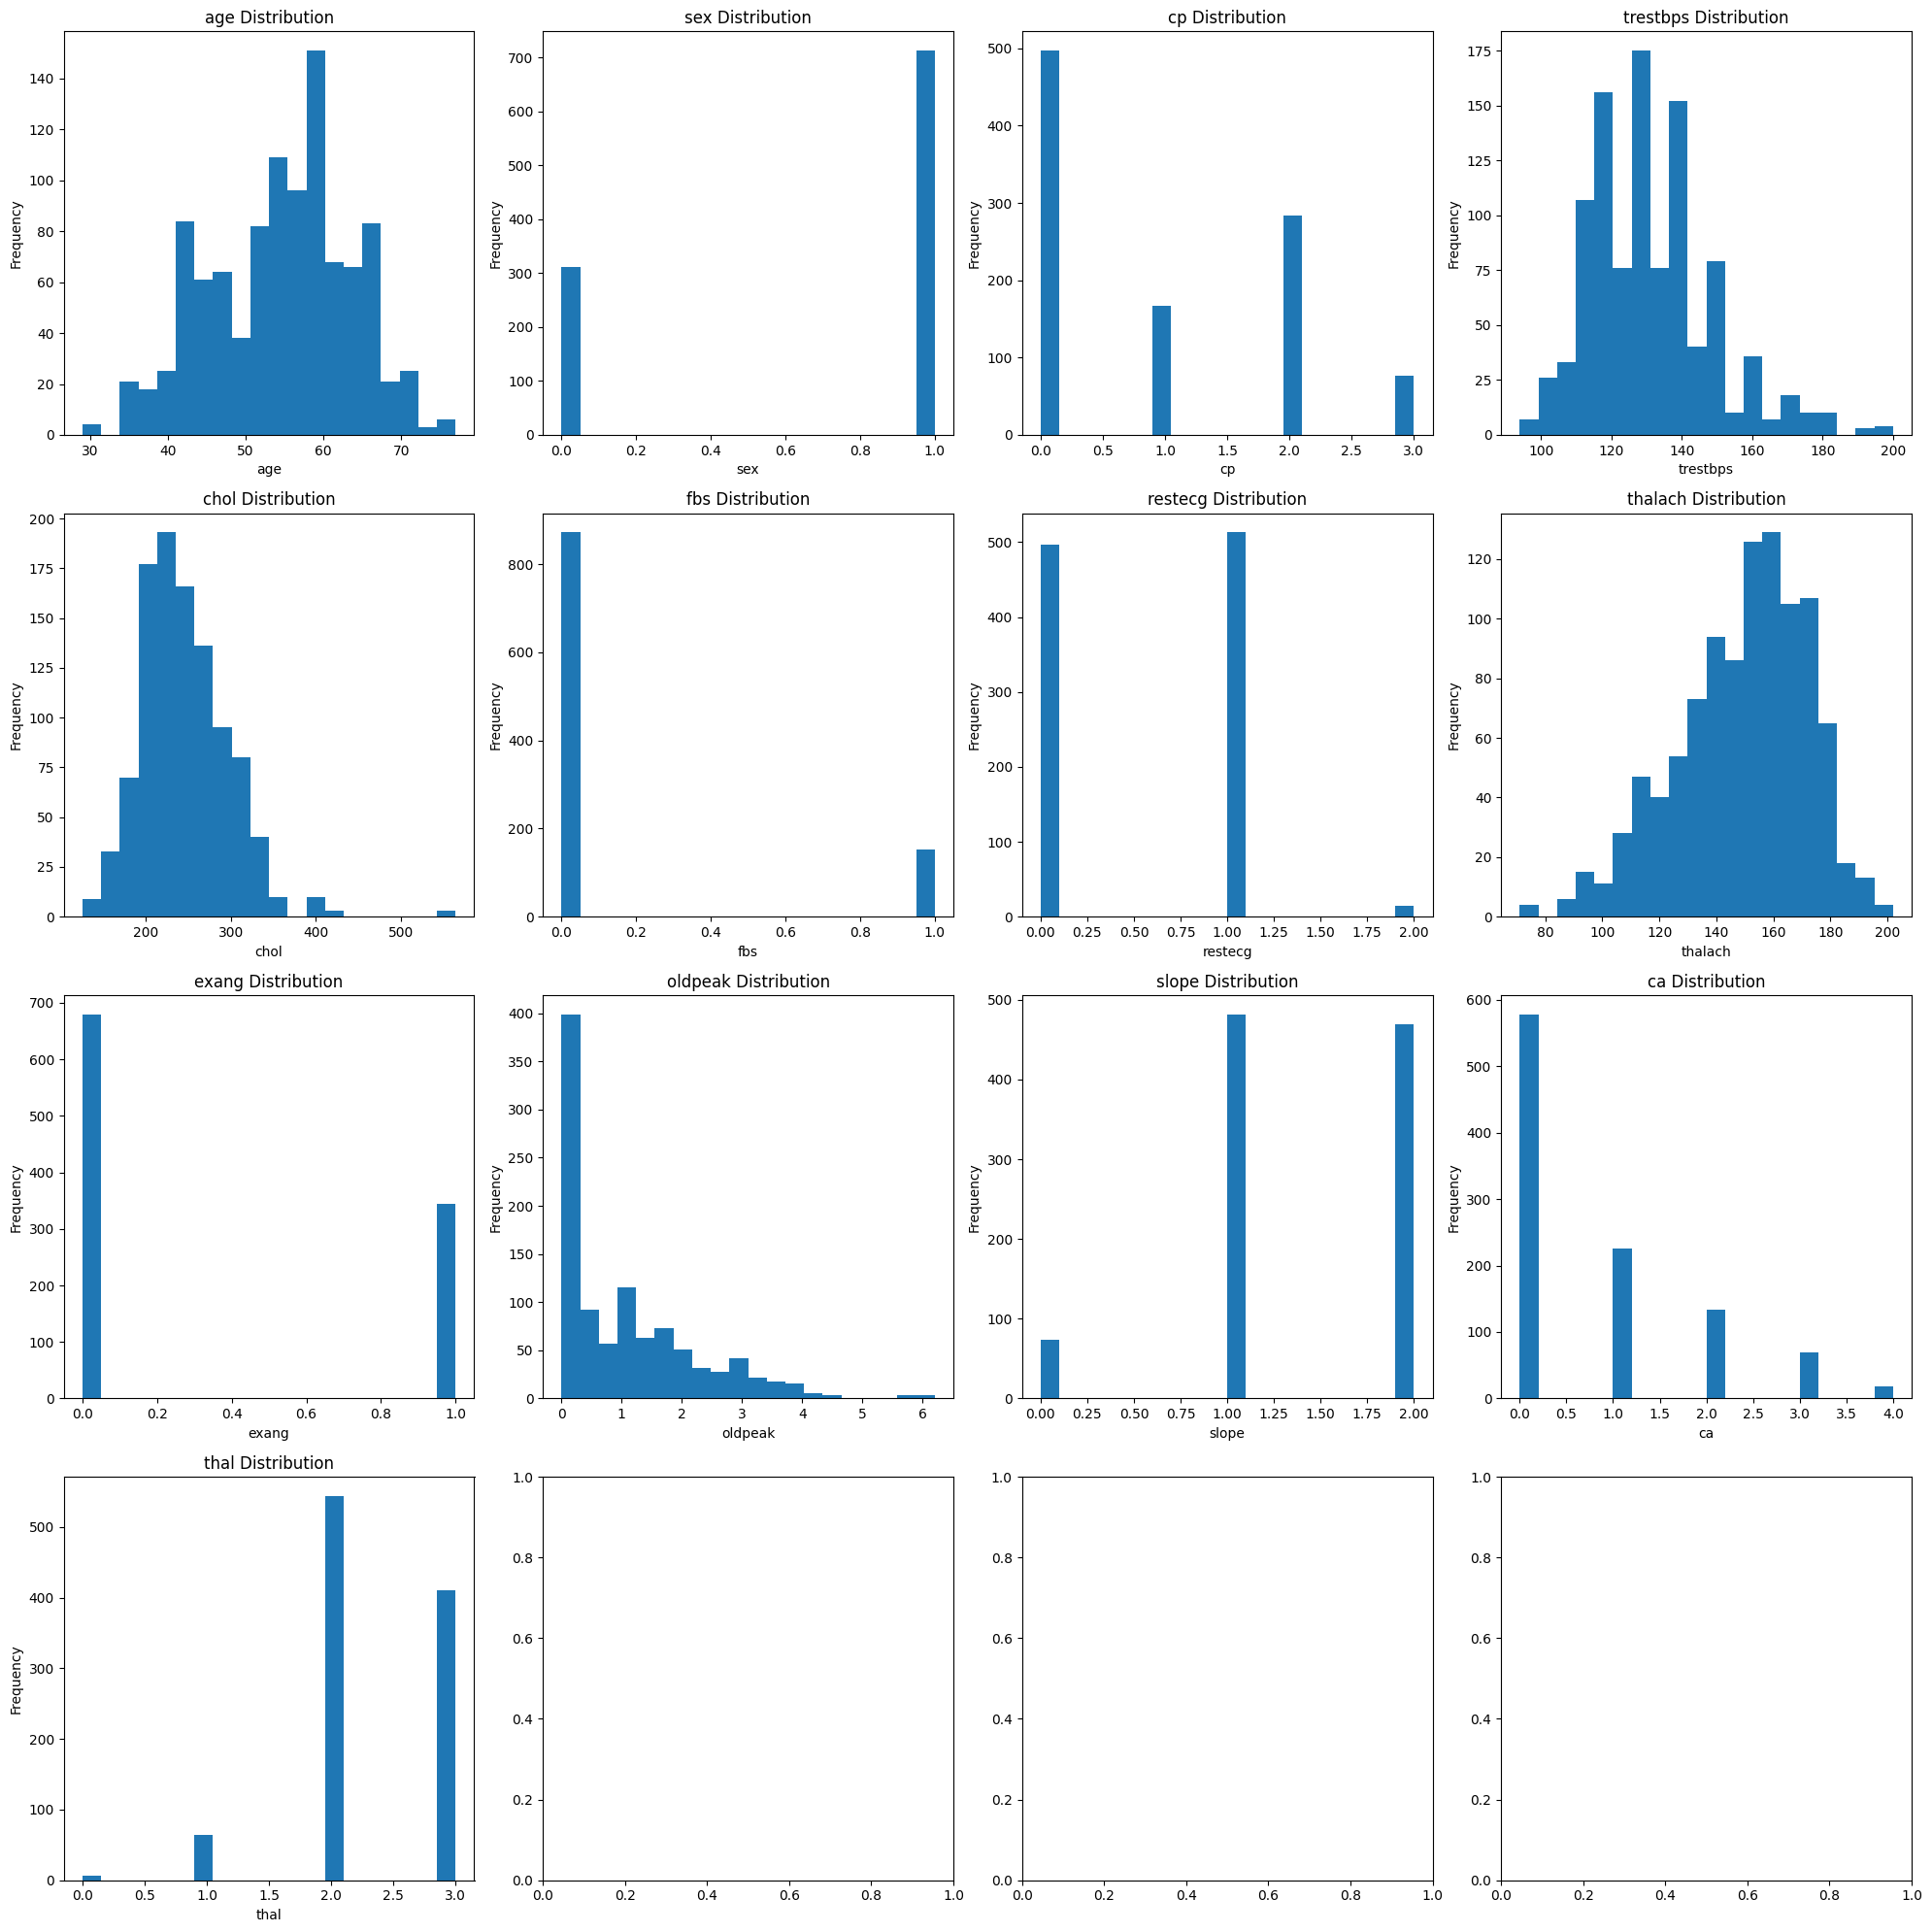

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Plot the distribution of each attribute
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if column != 'target':  # Exclude the target variable from the plots
        if df[column].dtype == 'object':  # Plot bar plot for categorical variables
            df[column].value_counts().plot(kind='bar', ax=axes[i])
            axes[i].set_title(column.capitalize() + ' Distribution')
        else:  # Plot histogram for numerical variables
            df[column].plot(kind='hist', ax=axes[i], bins=20)
            axes[i].set_title(column + ' Distribution')
            axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


#Split the data and train with SVM

In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set - X shape:", X_train.shape, "y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, "y shape:", y_test.shape)


Training set - X shape: (820, 13) y shape: (820,)
Testing set - X shape: (205, 13) y shape: (205,)


#Correlation matrix

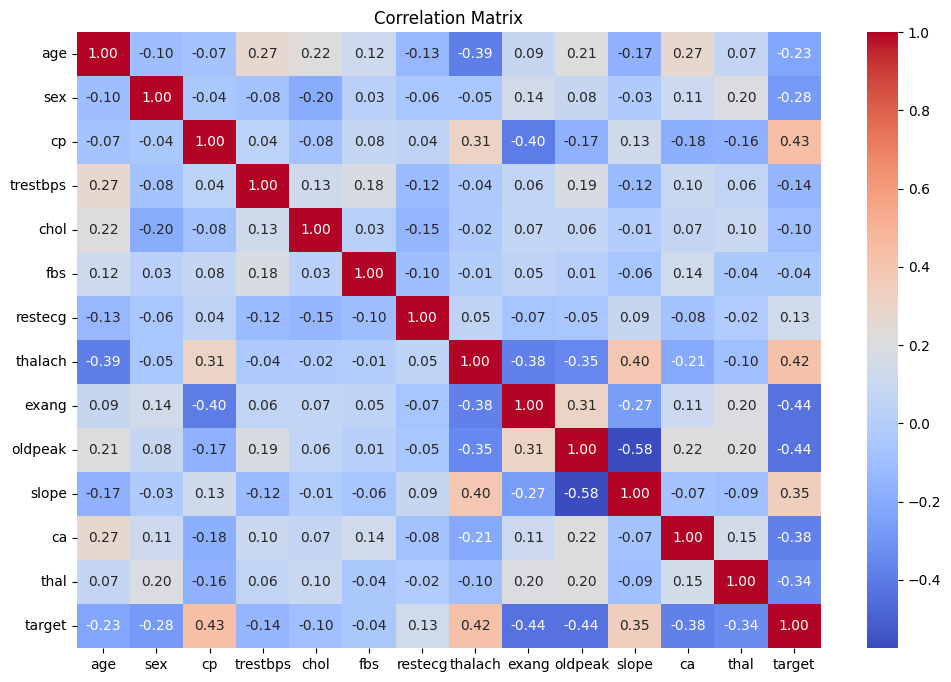

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


**Perception**: Highest impact attributes to the results: Chest pain type - loại đau ngực, maximum heart rate achieved - nhịp tim cao nhất khi vận động mạnh,  exercise-induced angina - có đau ngực khi vận động hay không, ST Depression Induced by Exercise Relative to Rest - Độ chênh ST, Number of Major Vessels Colored by Fluoroscopy - số nhánh chính động mạnh vành.

#Train model with SVM

**Observation**: The report of SVM with kernel = linear is better than RBF <br>
**Differences**: The differences between SVM with kernel = 'linear' and without 'linear': <br>
1. Linear Kernel (kernel='linear'):
- Decision Boundary: With a linear kernel, the decision boundary is a straight line (or a hyperplane in higher dimensions).
- Data Assumption: It assumes that the data is linearly separable, meaning the classes can be separated by a straight line or hyperplane.
- Computation: Computationally less expensive compared to non-linear kernels like RBF.
- Interpretability: Since the decision boundary is linear, the model is often easier to interpret.
- Performance: Performs well when the data is linearly separable or nearly linearly separable. If the linear model has better accuracy, F1-score, recall, and precision compared to the RBF model, it suggests that the data is well-separated by a linear boundary.
2. RBF Kernel (Default) (kernel='rbf'):
- Decision Boundary: With the default RBF kernel, the decision boundary can be non-linear and more flexible.
- Data Assumption: It does not assume any specific structure of the data and can capture complex relationships.
- Computation: More computationally expensive, especially for large datasets, due to the kernel trick and mapping to higher-dimensional space.
- Interpretability: The decision boundary in the transformed space is not as interpretable as in the linear case.
- Performance: Performs well when the data has non-linear relationships or when it's difficult to separate the classes with a linear boundary. However, if the linear model outperforms the RBF model in terms of accuracy, F1-score, recall, and precision, it suggests that the data may be well-separated by a linear boundary and the flexibility of the RBF kernel might not be necessary. <br>

**Explanation**: Get back the analysis of the data - 13 attributes => we can realize easily that the data can be separated linearly. <br>


#Train model with dimentional: reduction

##Features Selection

**Select highgest **

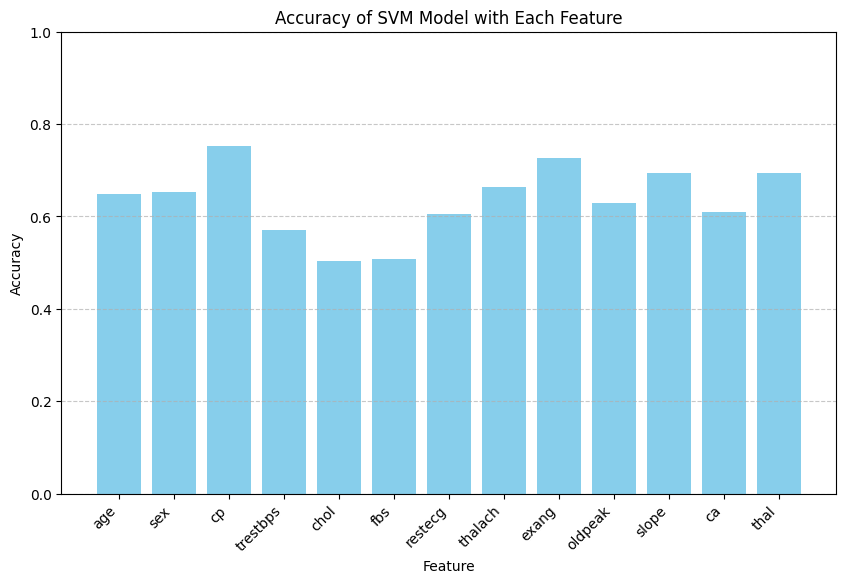

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df.drop('target', axis=1)
y = df['target']
feature_names = []
accuracies = []
for feature_name in X.columns:
    X_feature = X[[feature_name]]
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)
    svm_classifier = SVC(kernel='linear')
    svm_classifier.fit(X_train, y_train)
    y_pred = svm_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    feature_names.append(feature_name)
    accuracies.append(accuracy)
plt.figure(figsize=(10, 6))
plt.bar(feature_names, accuracies, color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model with Each Feature')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


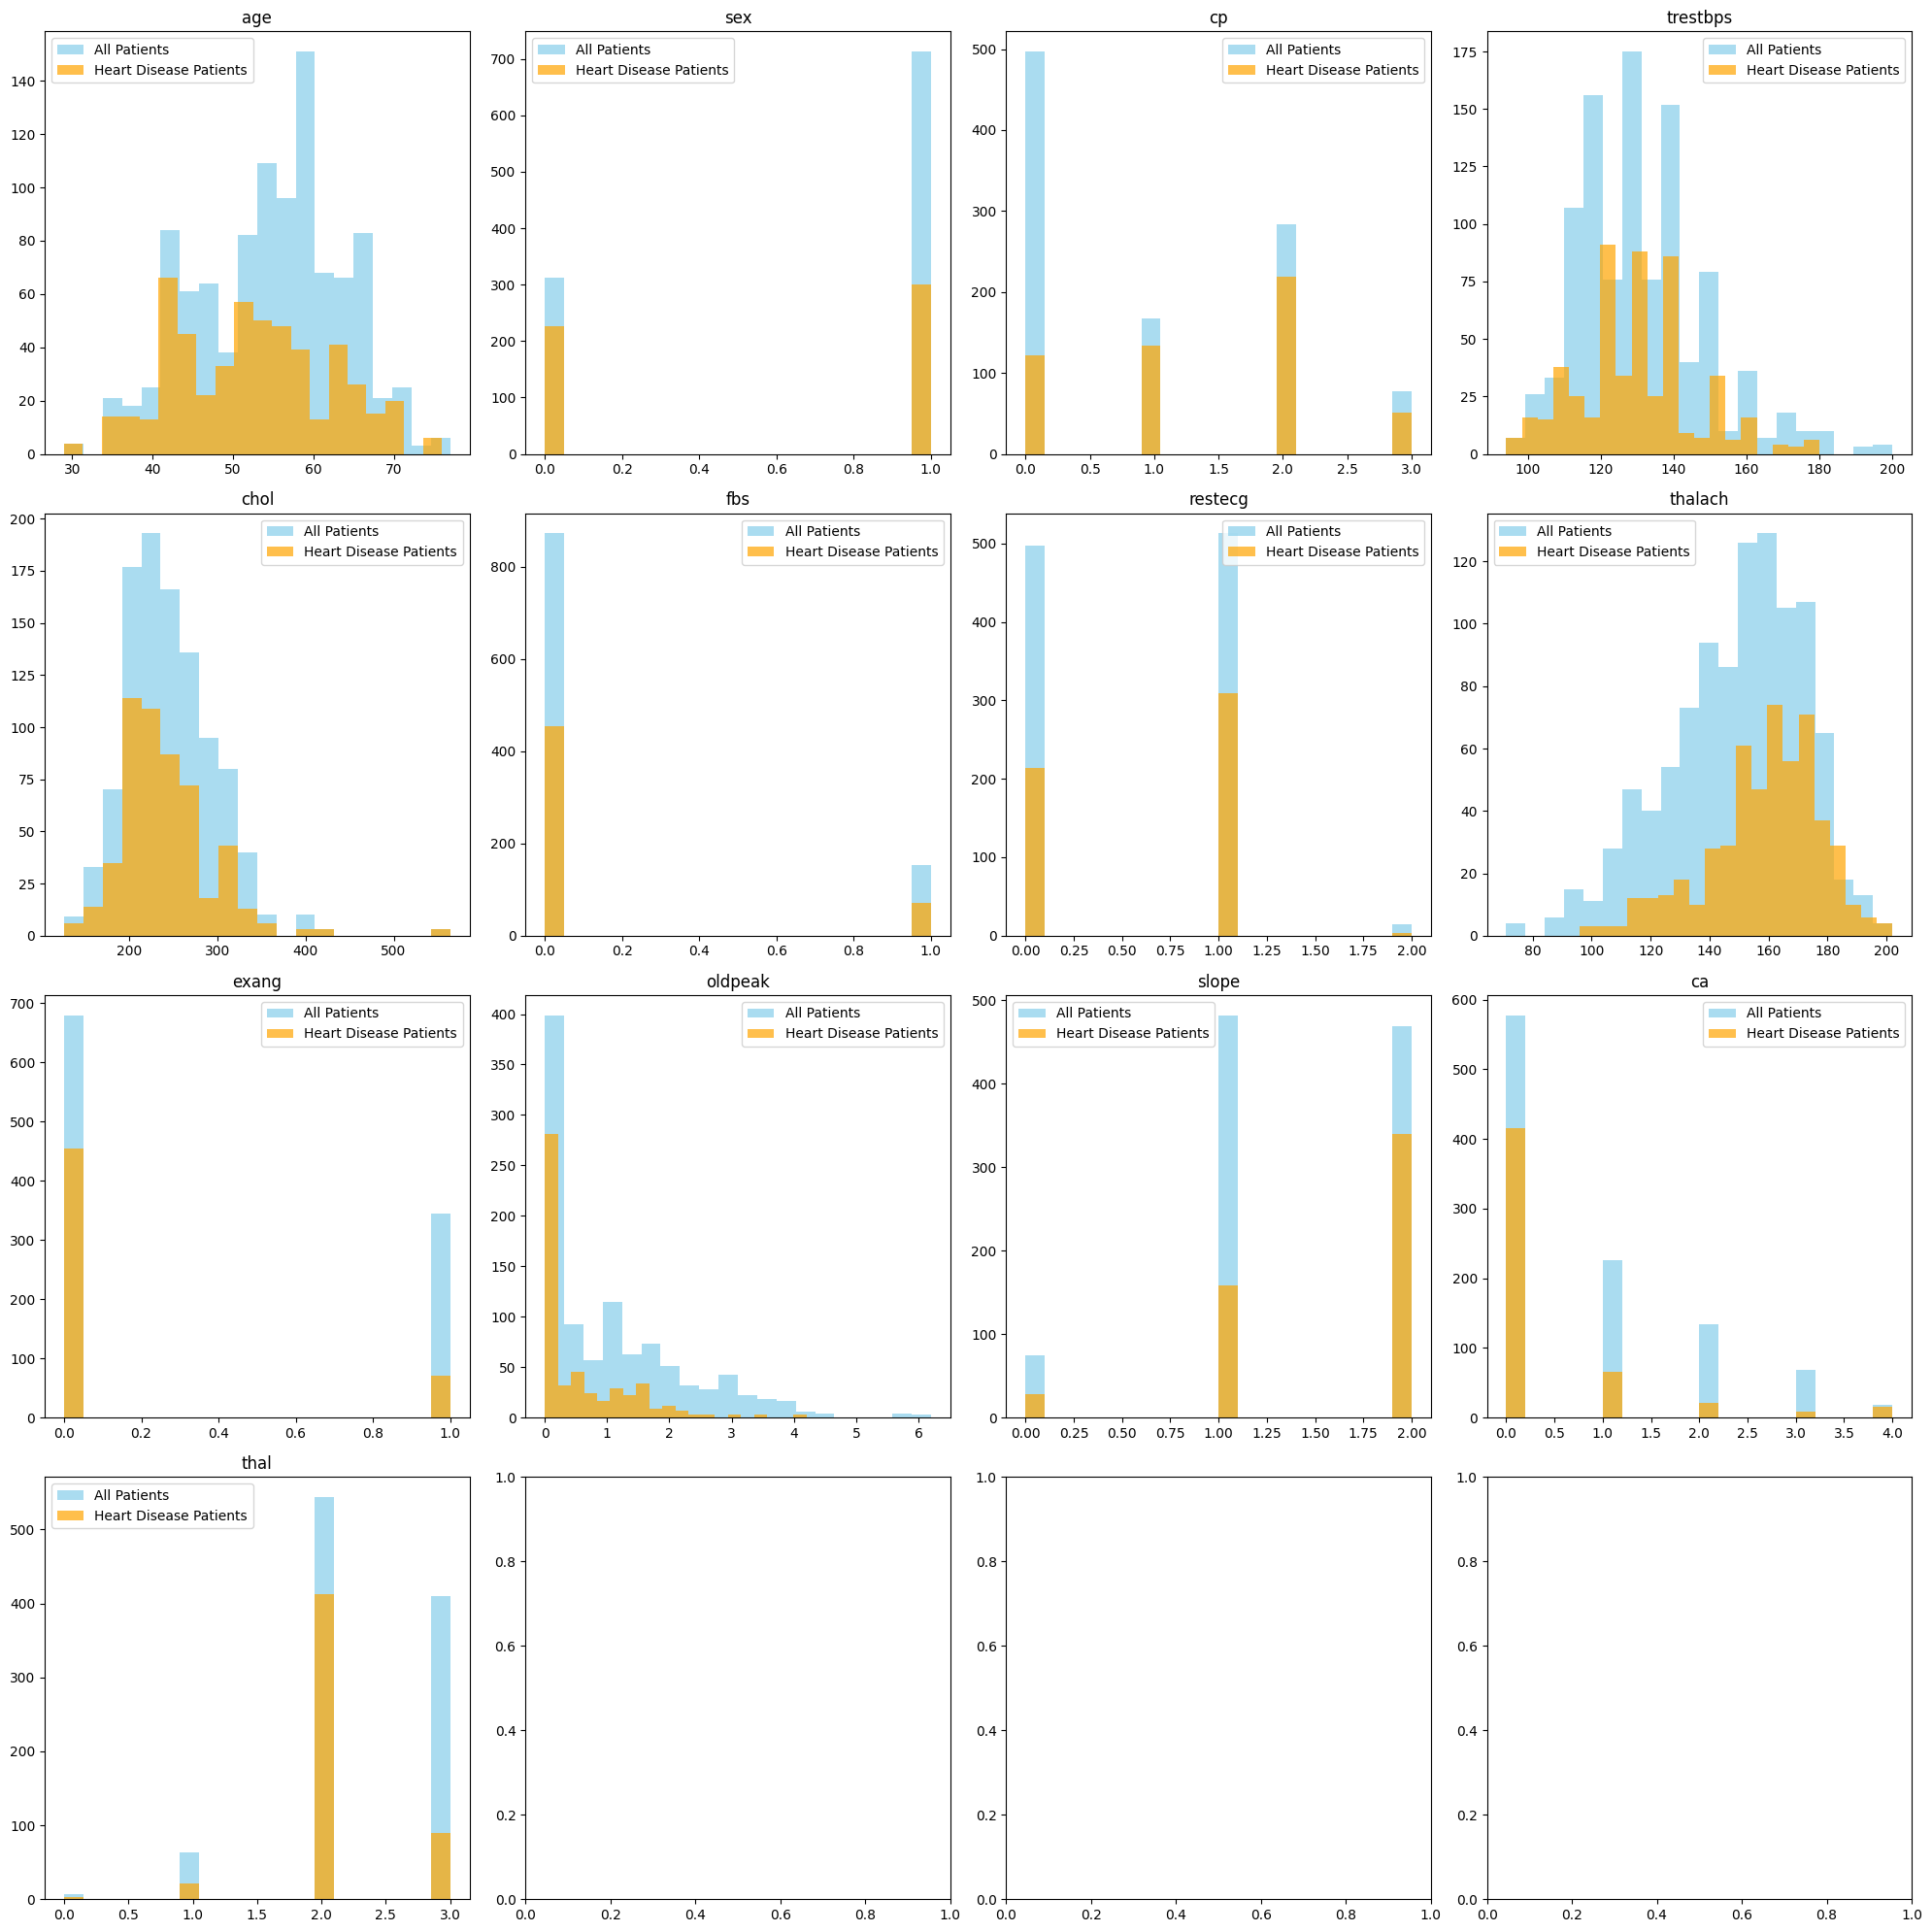

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Separate data for patients with heart disease (target=1)
heart_disease_df = df[df['target'] == 1]

# Plot histograms for each attribute
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(df.columns[:-1]):  # Exclude the 'target' column
    ax = axs[i // 4, i % 4]
    ax.hist(df[column], bins=20, color='skyblue', alpha=0.7, label='All Patients')
    ax.hist(heart_disease_df[column], bins=20, color='orange', alpha=0.7, label='Heart Disease Patients')
    ax.set_title(column)
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


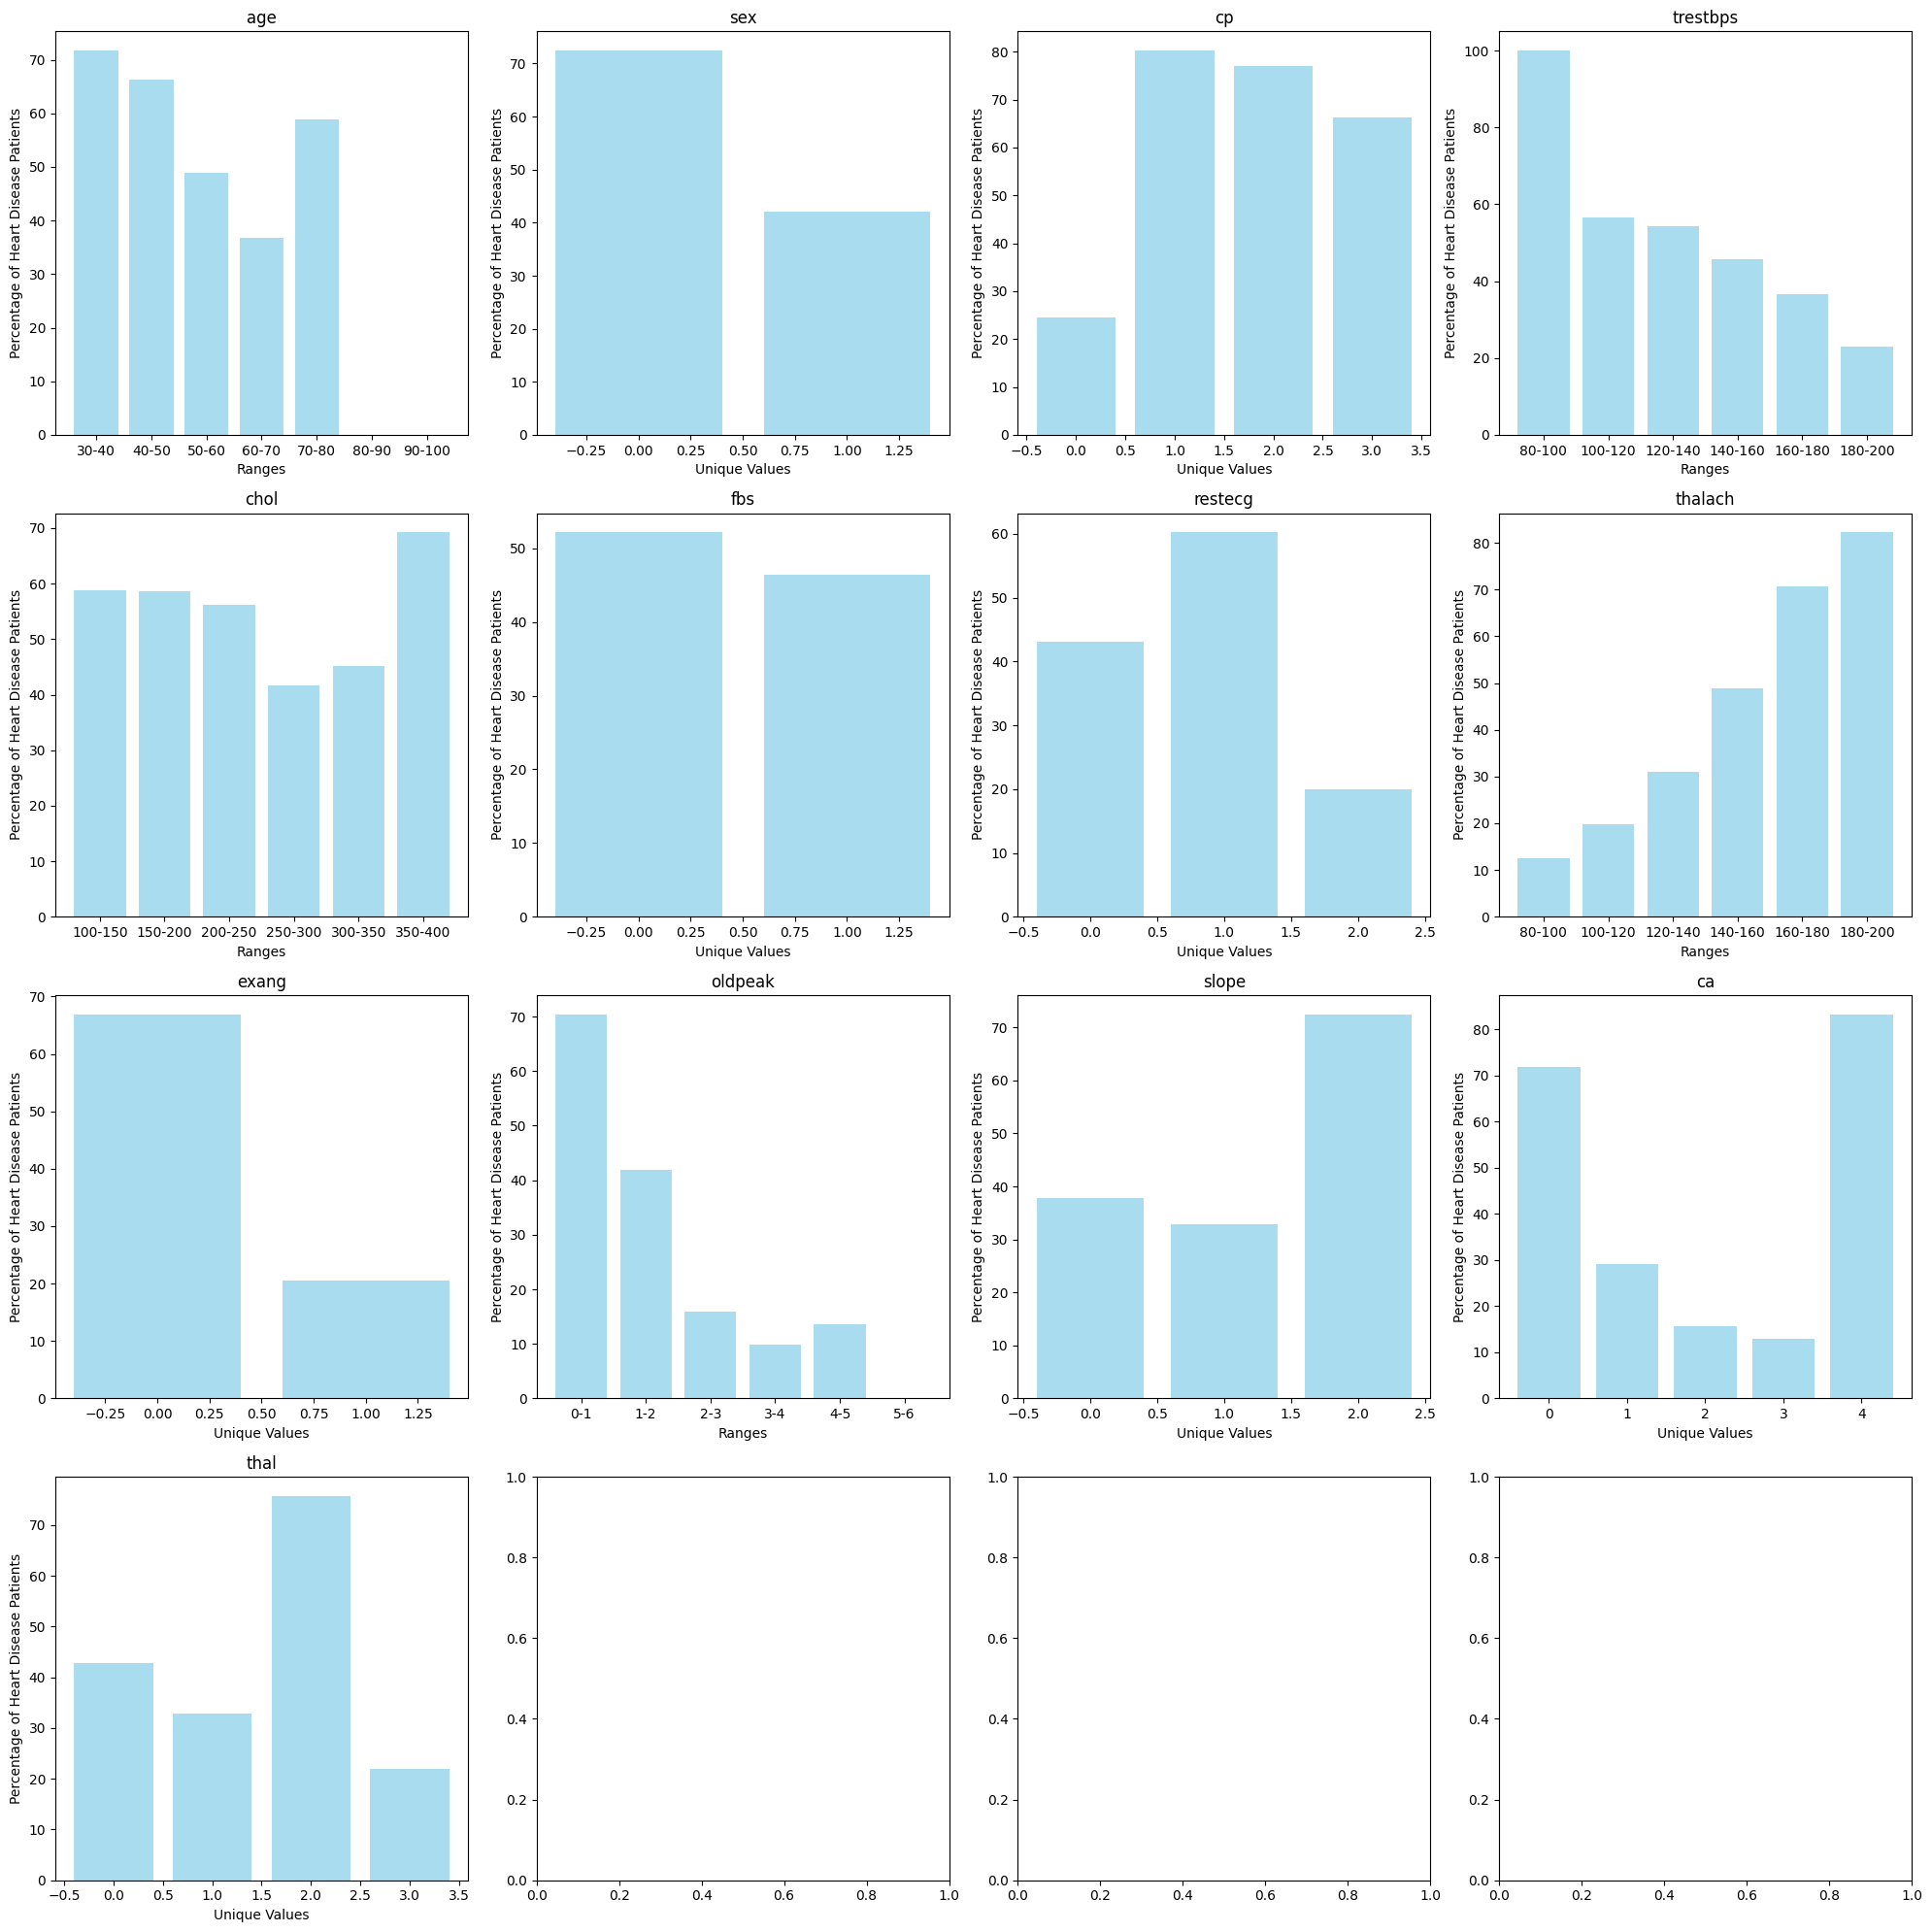

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Define the ranges for specific attributes
age_ranges = [(30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]
trestbps_ranges = [(80, 100), (100, 120), (120, 140), (140, 160), (160, 180), (180, 200)]
cholesterol_ranges = [(100, 150), (150, 200), (200, 250), (250, 300), (300, 350), (350, 400)]
thalach_ranges = [(80, 100), (100, 120), (120, 140), (140, 160), (160, 180), (180, 200)]
oldpeak_ranges = [(i, i+1) for i in range(0, 6)]

# Define a function to calculate the percentage of heart disease patients for each range
def calculate_percentage(df, attribute, ranges):
    percentage_per_range = []
    for start, end in ranges:
        filtered_df = df[(df[attribute] >= start) & (df[attribute] < end)]
        total_count = len(filtered_df)
        disease_count = len(filtered_df[filtered_df['target'] == 1])
        percentage = (disease_count / total_count) * 100 if total_count > 0 else 0
        percentage_per_range.append(percentage)
    return percentage_per_range

# Plot the percentage of heart disease patients for each attribute
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

attributes = df.columns[:-1]  # Exclude the target column
range_mapping = {
    'age': age_ranges,
    'trestbps': trestbps_ranges,
    'chol': cholesterol_ranges,
    'thalach': thalach_ranges,
    'oldpeak': oldpeak_ranges
}

for i, attribute in enumerate(attributes):
    ax = axs[i // 4, i % 4]

    if attribute in range_mapping:
        percentages = calculate_percentage(df, attribute, range_mapping[attribute])
        range_labels = [f'{start}-{end}' for start, end in range_mapping[attribute]]

        ax.bar(range_labels, percentages, color='skyblue', alpha=0.7)
    else:
        unique_values = df[attribute].unique()
        percentages = []
        for value in unique_values:
            total_count = len(df[df[attribute] == value])
            disease_count = len(df[(df[attribute] == value) & (df['target'] == 1)])
            percentage = (disease_count / total_count) * 100 if total_count > 0 else 0
            percentages.append(percentage)

        ax.bar(unique_values, percentages, color='skyblue', alpha=0.7)

    ax.set_title(attribute)
    ax.set_xlabel('Ranges' if attribute in range_mapping else 'Unique Values')
    ax.set_ylabel('Percentage of Heart Disease Patients')

# Adjust layout
plt.tight_layout()
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       102
           1       0.72      0.86      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.78      0.77      0.76       205



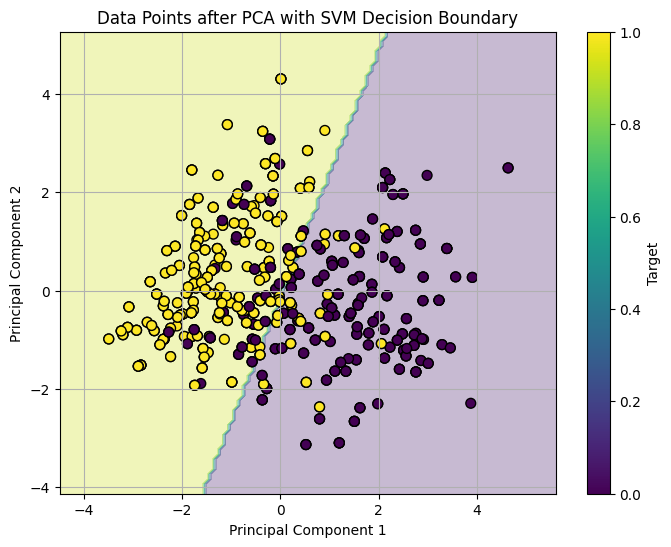

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train the SVM model using PCA transformed features
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test_pca)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Define the mesh grid for the plot
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Obtain the decision boundary (SVM line)
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points after applying PCA
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Points after PCA with SVM Decision Boundary')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


**Perception**: with the attributes having highest value in the correlation matrix, we have a similar result to the linear model. And you can see that the selected attributes actually have a big impact into the heart disease. <br>
**Conclusion**: The selected attributes have a big effect on the final result, so for this model we can remove the other attributes acceptably.

##PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
from sklearn.feature_selection import RFE

svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=2)  # Choose the number of features
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Train the model
svm.fit(X_train_pca, y_train)
y_pred = svm.predict(X_test_pca)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.67      0.74       102
           1       0.72      0.86      0.79       103

    accuracy                           0.77       205
   macro avg       0.78      0.77      0.76       205
weighted avg       0.78      0.77      0.76       205



**Perception**: We have a similar result after applying PCA

#Conclusion for all project

**The aspects may have bighest impact to the heart disease** <br>
- Chest pain type
- Maximum Heart Rate Achieved
- Exercise Induced Angina
- ST Depression Induced by Exercise Relative to Rest
- Slope of the Peak Exercise ST Segment
- Number of Major Vessels Colored by Fluoroscopy
- Thalassemia

**Data**<br>
- Dataset provided 13 attributes with different effects on the result
- Data should be applied for the linear models because the result can be separated linearly based on the analyzed attributes
- Data have a good connection between the attributes and the differences between heart disease patients and normal people. So that after applying dimensional reduction, we still have acceptable results of the model.
- More data is better.

**Model**<br>
- The SVM with kernel = linear is good for this dataset, not only the heart disease can be separated linearly, but also in the medical aspect, the prediction value of ~ 80 is acceptable. It will lead to early prediction of heart disease and help the patients and doctors have a good strategy to have appropriate health examination and treatment methods.



@@@@@@@@@@@@@@@@@@@@@@@@@

Select pairs from  attributes and draw the prediction to demonstate the  linearity of the data


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


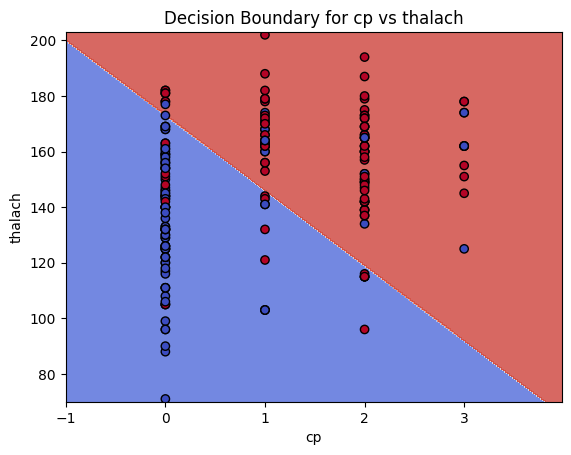

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


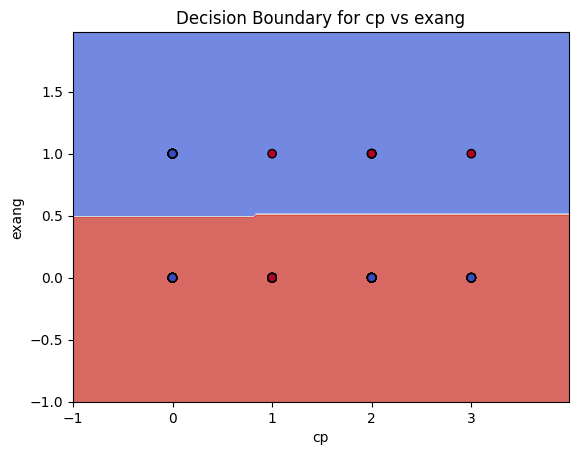

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


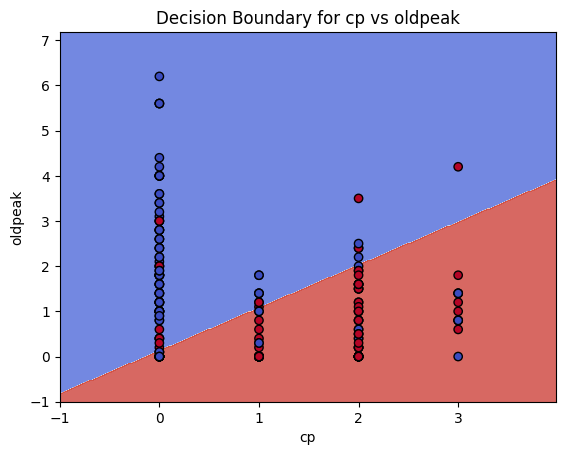

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


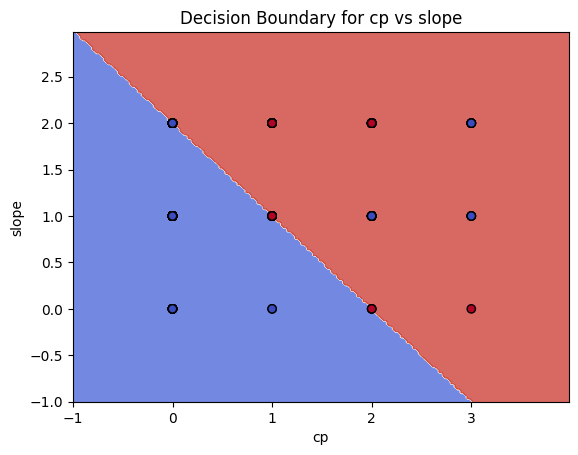

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


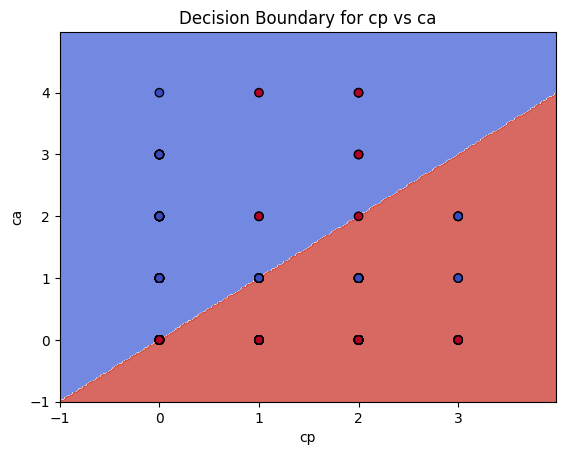

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


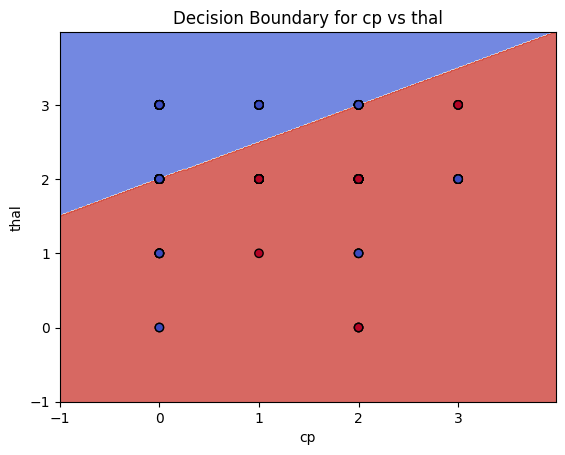

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


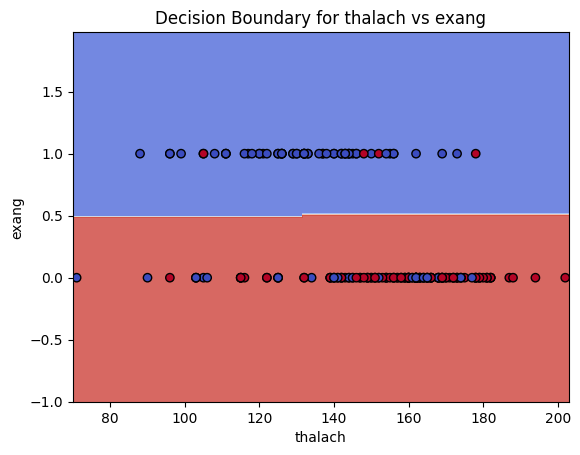

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


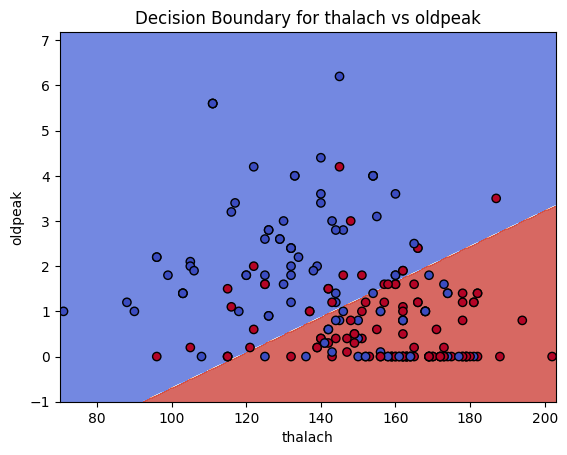

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


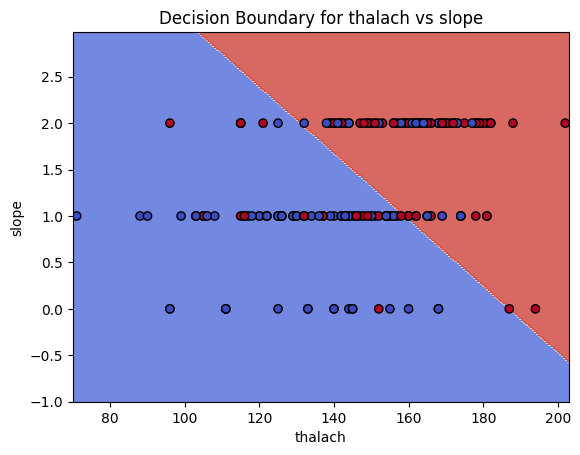

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


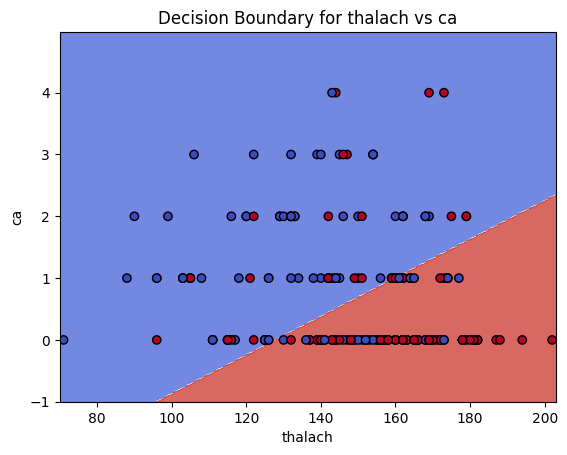

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


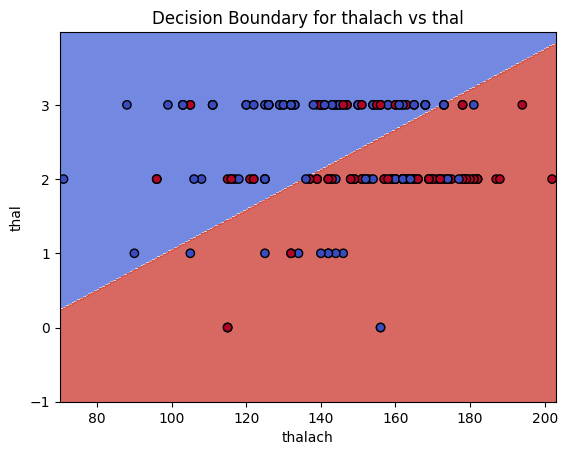

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


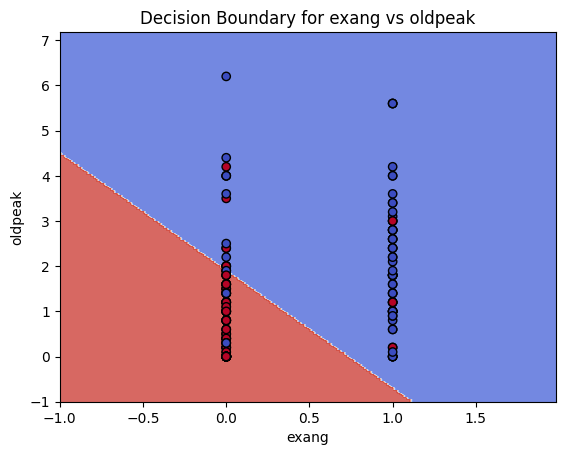

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


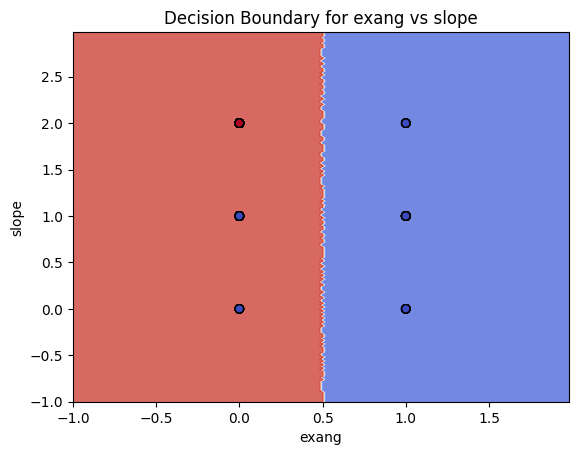

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


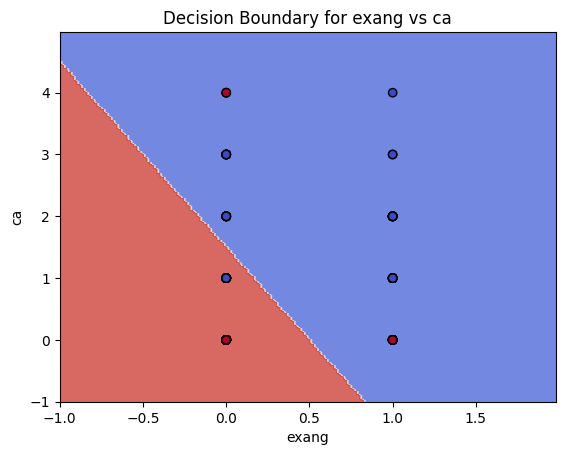

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


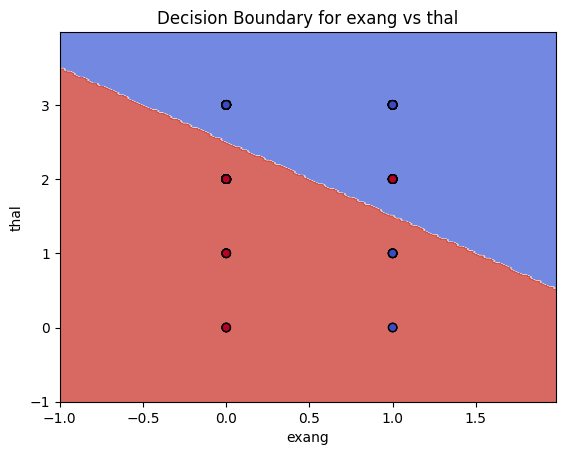

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


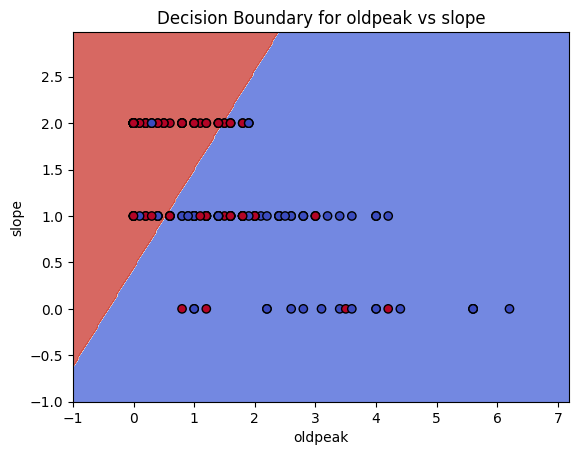

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


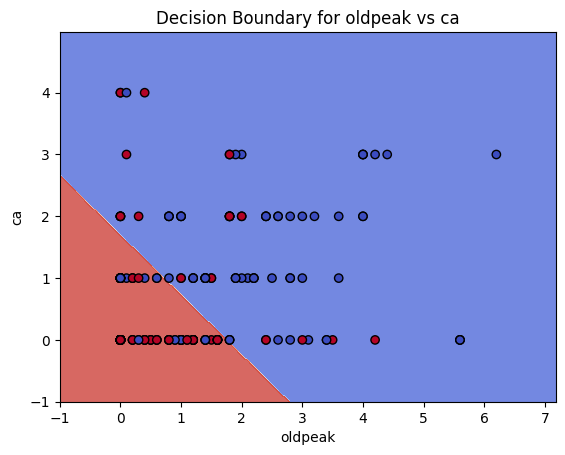

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


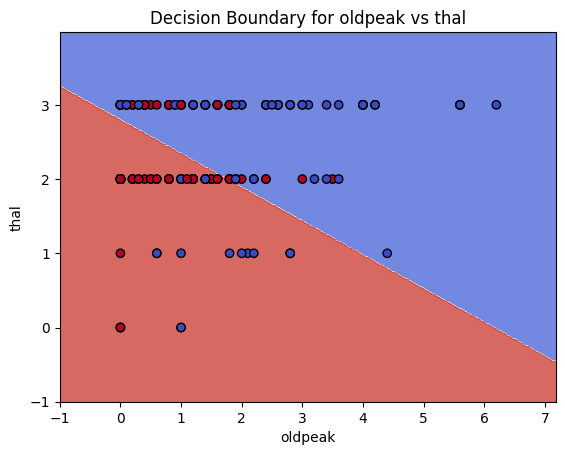

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


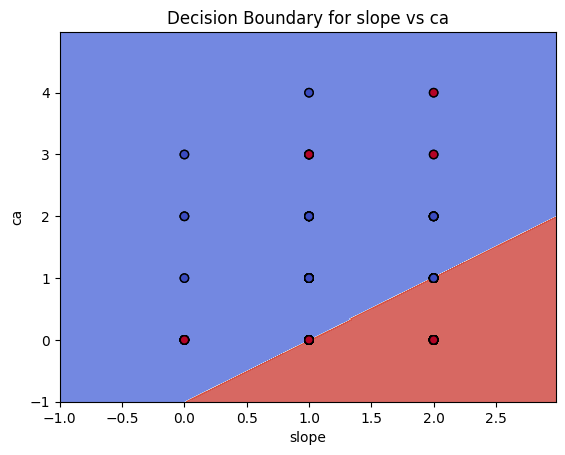

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


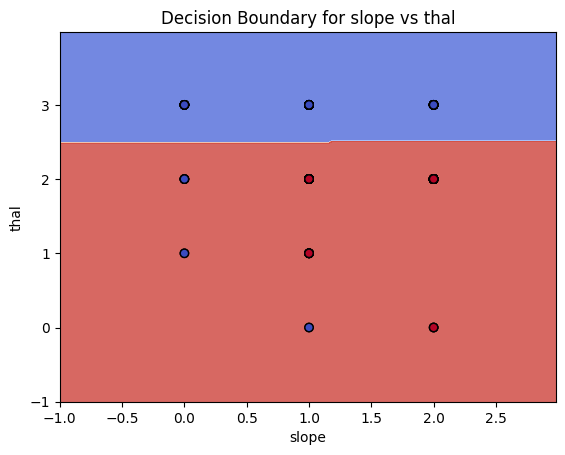

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


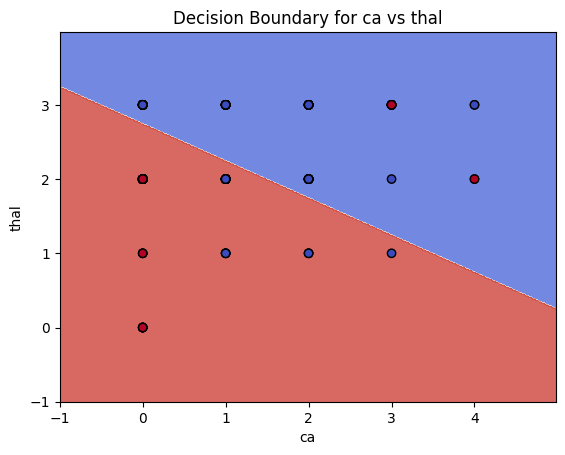

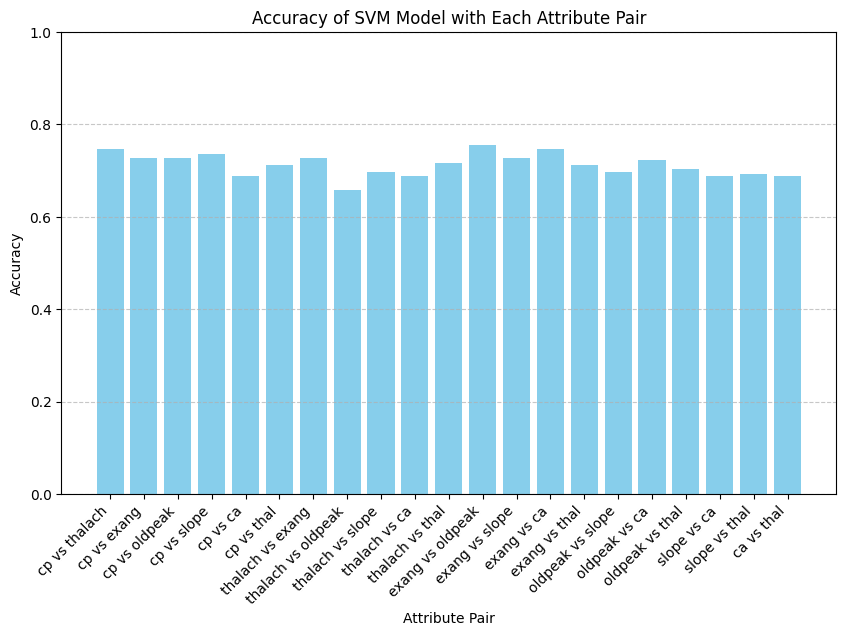

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    if X.shape[1] != 2:  # Check if DataFrame has exactly 2 columns
        print("Error: The DataFrame must have exactly 2 columns for plotting the decision boundary.")
        return

    h = .02  # Step size in the mesh
    # Create a meshgrid of feature values
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Make predictions on meshgrid points
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary and the points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# Initialize lists to store pairs of attributes and accuracies
pair_names = []
accuracies = []

# Iterate over each pair of attributes
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        pair_name = X.columns[i] + ' vs ' + X.columns[j]
        pair_names.append(pair_name)

        # Select the pair of attributes
        X_pair = X[[X.columns[i], X.columns[j]]]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

        # Train the SVM model
        svm_classifier = SVC(kernel='linear')
        svm_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = svm_classifier.predict(X_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Plot the decision boundary
        plot_decision_boundary(X_test, y_test, svm_classifier, "Decision Boundary for " + pair_name)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(pair_names, accuracies, color='skyblue')
plt.xlabel('Attribute Pair')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model with Each Attribute Pair')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


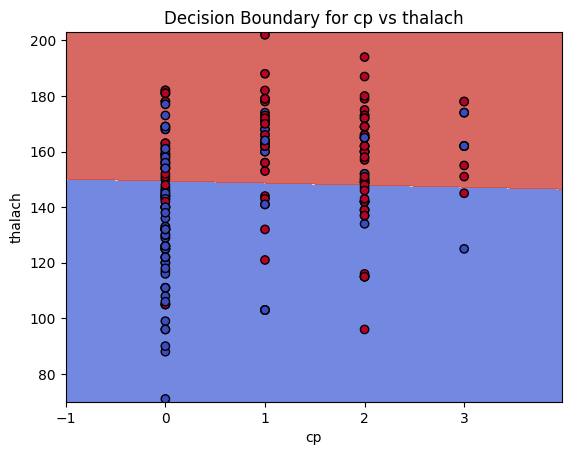

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


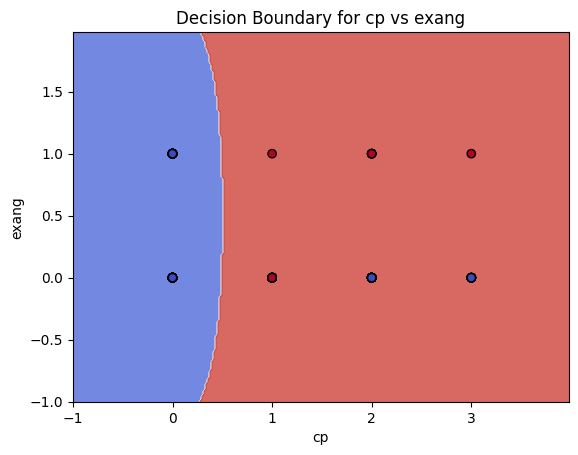

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


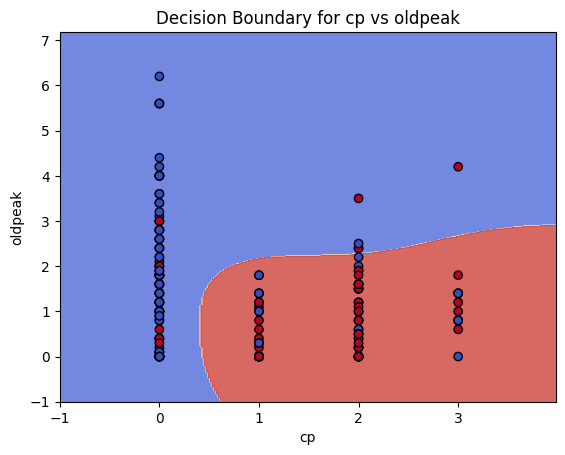

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


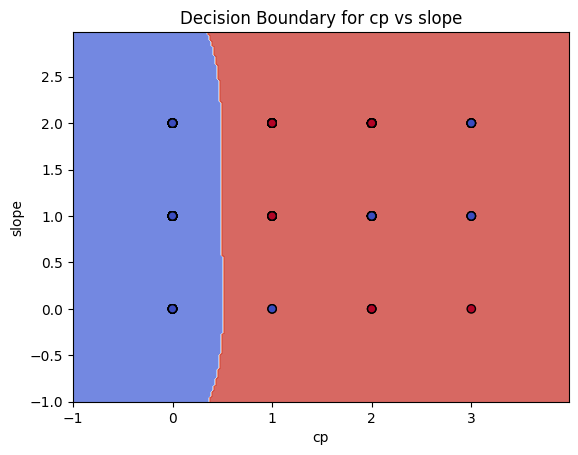

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


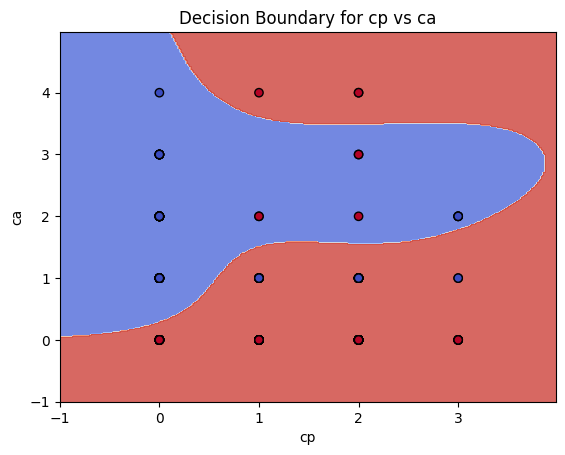

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


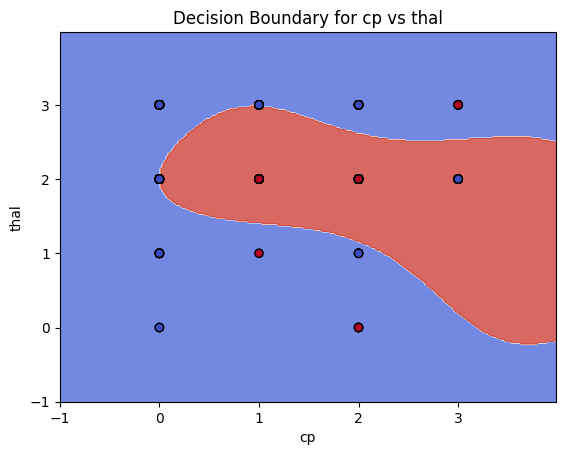

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


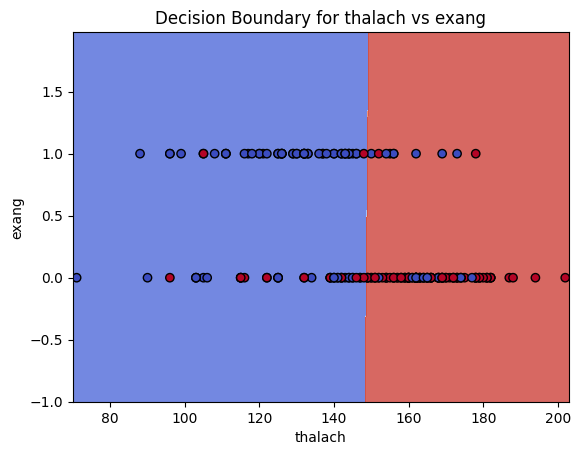

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


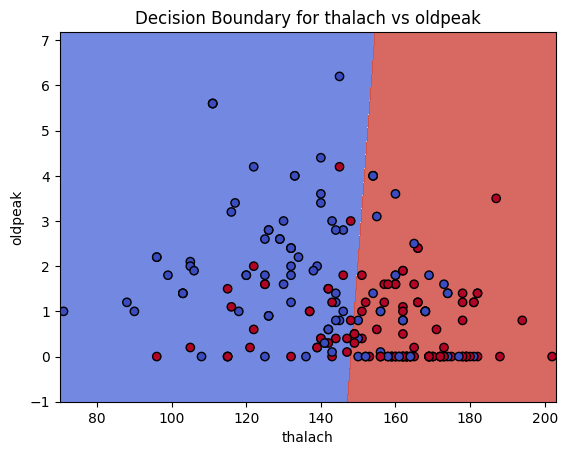

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


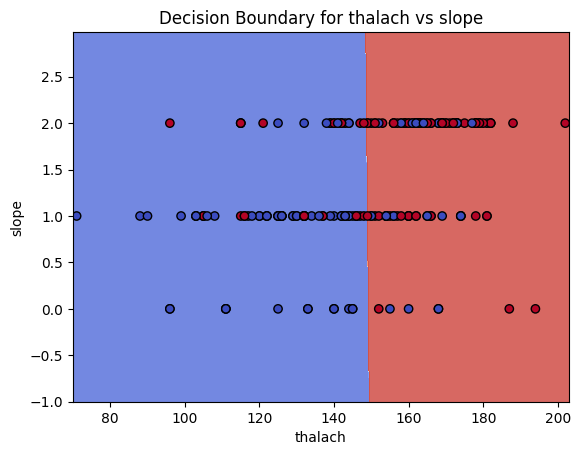

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


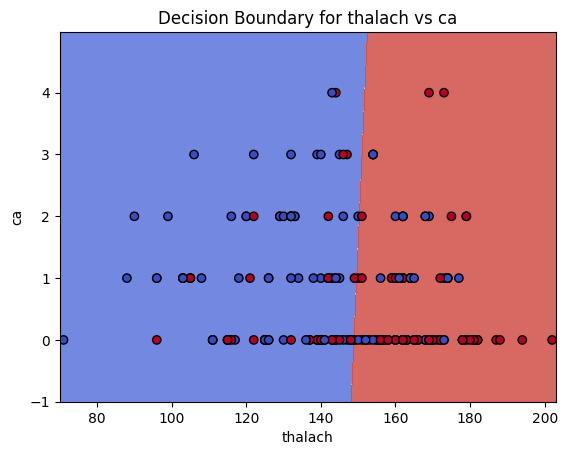

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


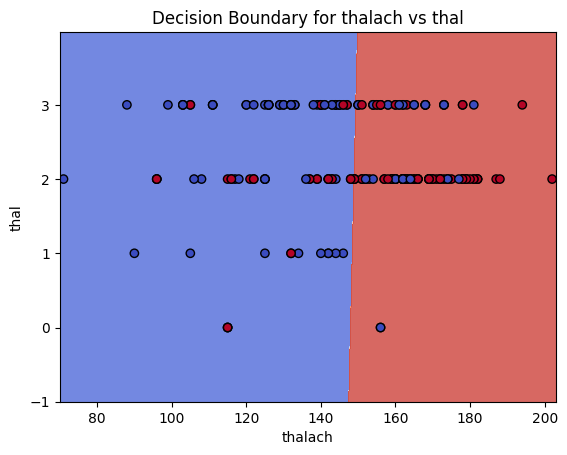

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


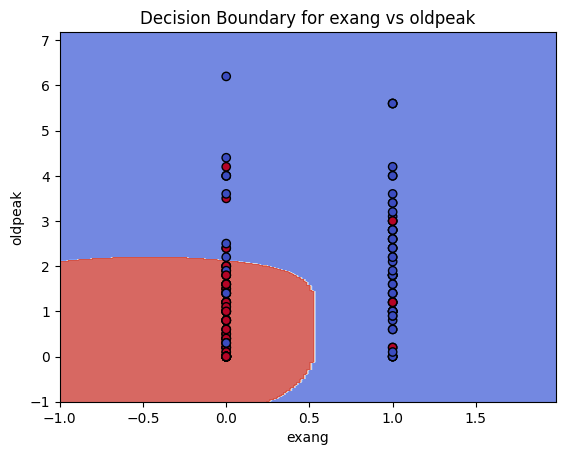

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


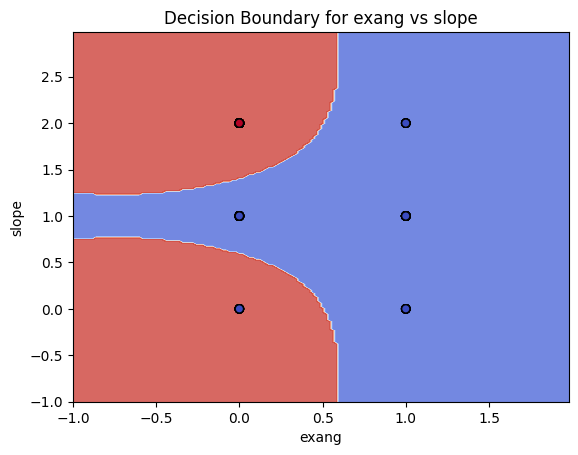

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


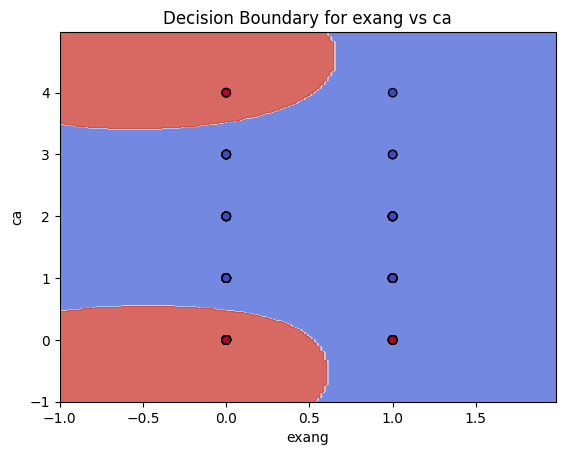

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


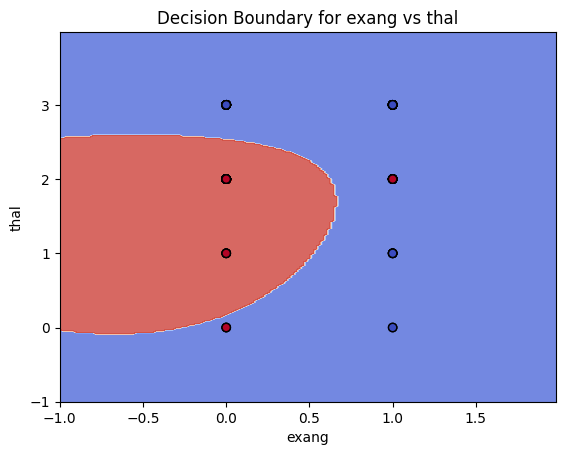

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


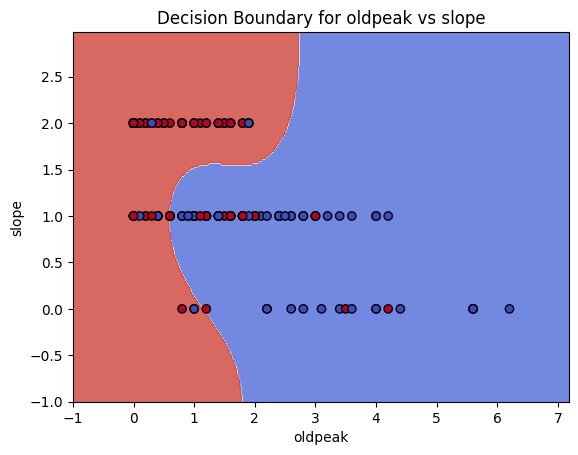

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


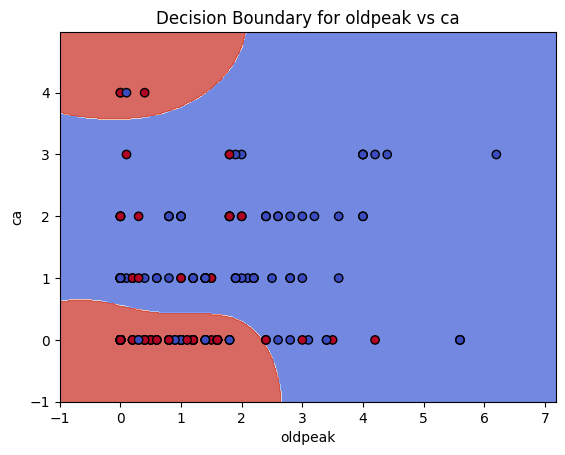

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


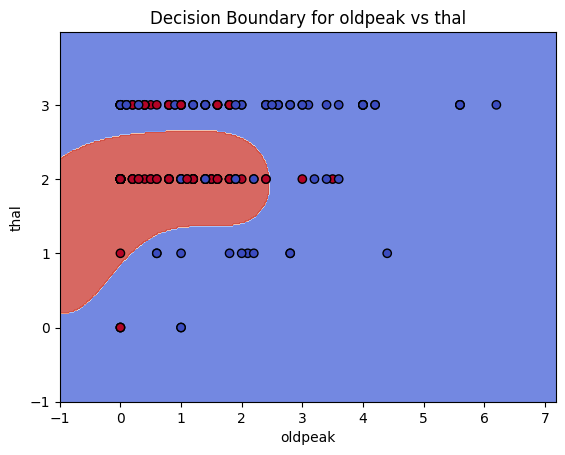

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


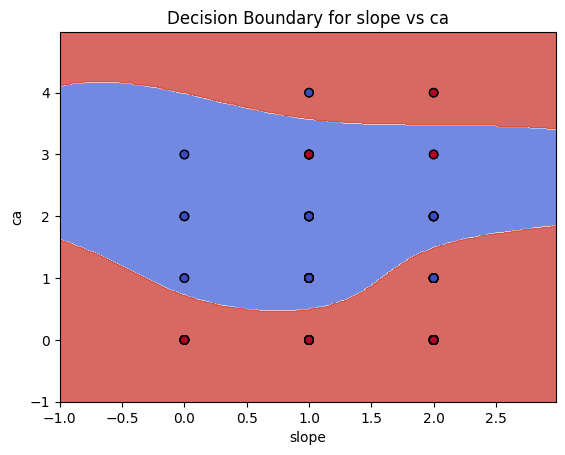

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


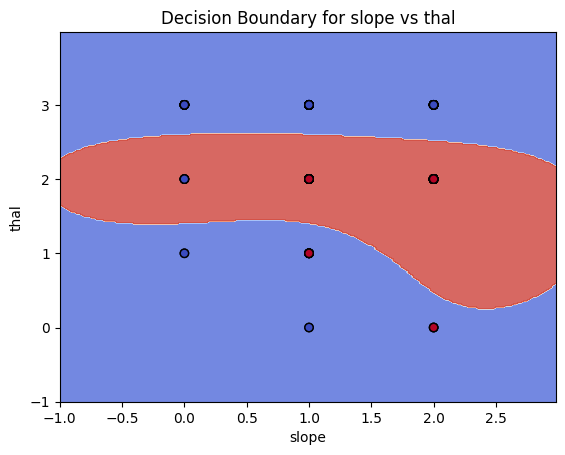

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


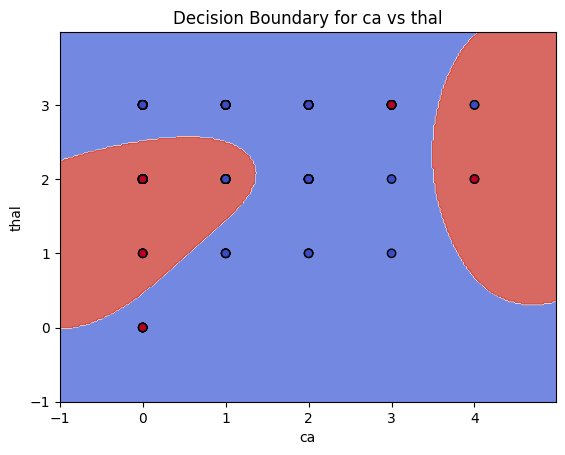

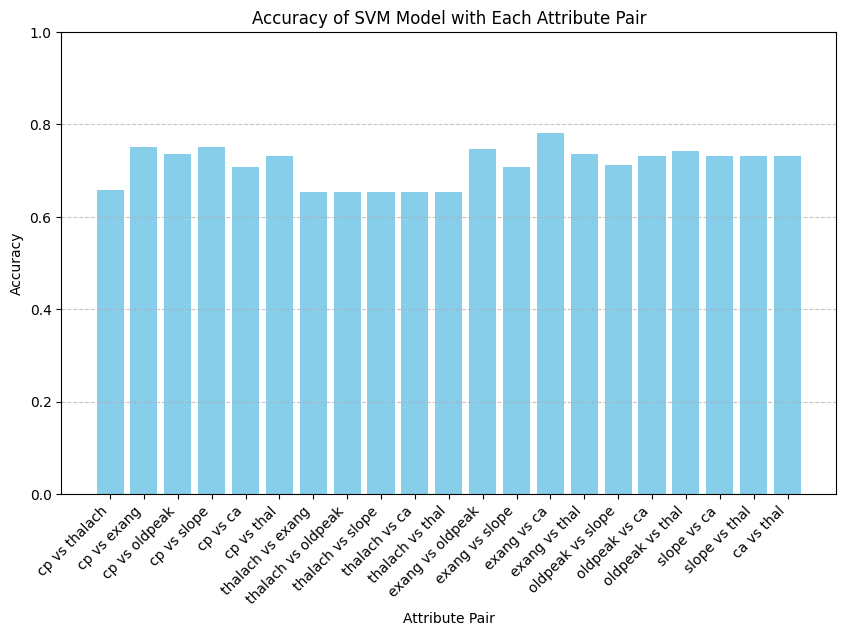

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    if X.shape[1] != 2:  # Check if DataFrame has exactly 2 columns
        print("Error: The DataFrame must have exactly 2 columns for plotting the decision boundary.")
        return

    h = .02  # Step size in the mesh
    # Create a meshgrid of feature values
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    # Make predictions on meshgrid points
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the decision boundary and the points
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.show()

# Initialize lists to store pairs of attributes and accuracies
pair_names = []
accuracies = []

# Iterate over each pair of attributes
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        pair_name = X.columns[i] + ' vs ' + X.columns[j]
        pair_names.append(pair_name)

        # Select the pair of attributes
        X_pair = X[[X.columns[i], X.columns[j]]]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

        # Train the SVM model
        svm_classifier = SVC()
        svm_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = svm_classifier.predict(X_test)

        # Calculate accuracy and store it
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        # Plot the decision boundary
        plot_decision_boundary(X_test, y_test, svm_classifier, "Decision Boundary for " + pair_name)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(pair_names, accuracies, color='skyblue')
plt.xlabel('Attribute Pair')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model with Each Attribute Pair')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


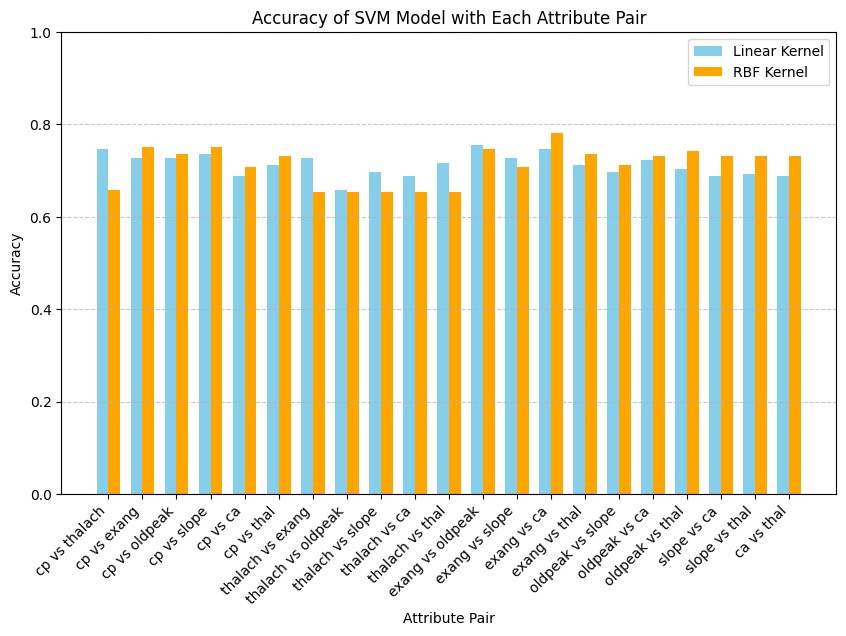

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')
X = df[['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = df['target']

# Initialize lists to store pairs of attributes and accuracies
pair_names = []
accuracies_linear = []
accuracies_rbf = []

# Iterate over each pair of attributes
for i in range(len(X.columns)):
    for j in range(i + 1, len(X.columns)):
        pair_name = X.columns[i] + ' vs ' + X.columns[j]
        pair_names.append(pair_name)

        # Select the pair of attributes
        X_pair = X[[X.columns[i], X.columns[j]]]

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_pair, y, test_size=0.2, random_state=42)

        # Train the SVM model with linear kernel
        svm_classifier_linear = SVC(kernel='linear')
        svm_classifier_linear.fit(X_train, y_train)

        # Make predictions on the test data with linear kernel
        y_pred_linear = svm_classifier_linear.predict(X_test)

        # Calculate accuracy and store it for linear kernel
        accuracy_linear = accuracy_score(y_test, y_pred_linear)
        accuracies_linear.append(accuracy_linear)

        # Train the SVM model with rbf kernel
        svm_classifier_rbf = SVC(kernel='rbf')
        svm_classifier_rbf.fit(X_train, y_train)

        # Make predictions on the test data with rbf kernel
        y_pred_rbf = svm_classifier_rbf.predict(X_test)

        # Calculate accuracy and store it for rbf kernel
        accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
        accuracies_rbf.append(accuracy_rbf)

# Plot the accuracies
plt.figure(figsize=(10, 6))
width = 0.35  # Width of the bars
ind = np.arange(len(pair_names))  # The x locations for the groups
plt.bar(ind - width/2, accuracies_linear, width, color='skyblue', label='Linear Kernel')
plt.bar(ind + width/2, accuracies_rbf, width, color='orange', label='RBF Kernel')
plt.xlabel('Attribute Pair')
plt.ylabel('Accuracy')
plt.title('Accuracy of SVM Model with Each Attribute Pair')
plt.xticks(ind, pair_names, rotation=45, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


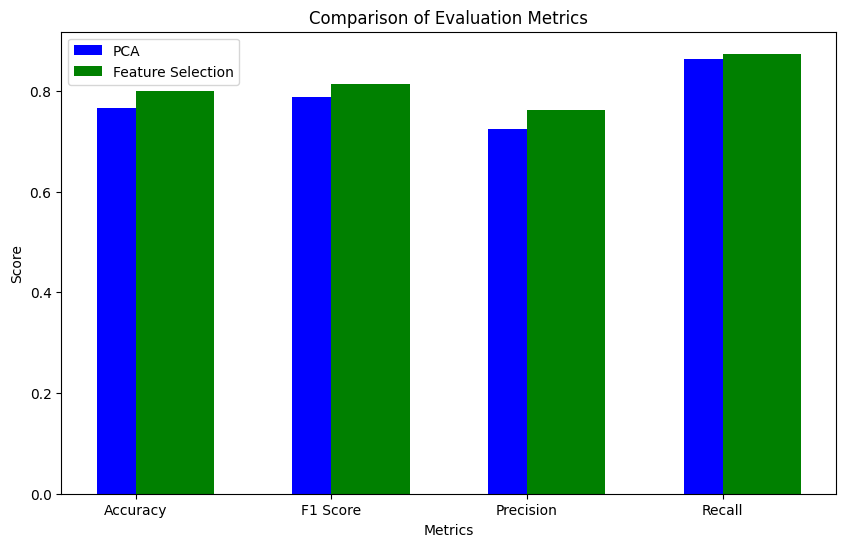

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Selected attributes for feature selection
selected_attributes = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Prepare the feature matrix (X) and target variable (y) for feature selection
X_fs = df[selected_attributes]
y_fs = df['target']

# Prepare the feature matrix (X) and target variable (y) for PCA
X_pca = df.drop('target', axis=1)
y_pca = df['target']

# Split the data into training and testing sets for feature selection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Split the data into training and testing sets for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Standardize the features for PCA
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train_pca)
X_test_scaled_pca = scaler_pca.transform(X_test_pca)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)

# Train the SVM model using PCA transformed features
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train_pca)

# Train the SVM model using selected attributes
svm_fs = SVC(kernel='linear')
svm_fs.fit(X_train_fs, y_train_fs)

# Make predictions on the test data for PCA
y_pred_pca = svm_pca.predict(X_test_pca)

# Make predictions on the test data for feature selection
y_pred_fs = svm_fs.predict(X_test_fs)

# Calculate evaluation metrics for PCA model
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
f1_pca = f1_score(y_test_pca, y_pred_pca)
precision_pca = precision_score(y_test_pca, y_pred_pca)
recall_pca = recall_score(y_test_pca, y_pred_pca)

# Calculate evaluation metrics for feature selection model
accuracy_fs = accuracy_score(y_test_fs, y_pred_fs)
f1_fs = f1_score(y_test_fs, y_pred_fs)
precision_fs = precision_score(y_test_fs, y_pred_fs)
recall_fs = recall_score(y_test_fs, y_pred_fs)

# Plot the comparison
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
pca_scores = [accuracy_pca, f1_pca, precision_pca, recall_pca]
fs_scores = [accuracy_fs, f1_fs, precision_fs, recall_fs]

plt.figure(figsize=(10, 6))
plt.bar(metrics, pca_scores, width=0.4, align='center', label='PCA', color='blue')
plt.bar(metrics, fs_scores, width=0.4, align='edge', label='Feature Selection', color='green')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.legend()
plt.show()


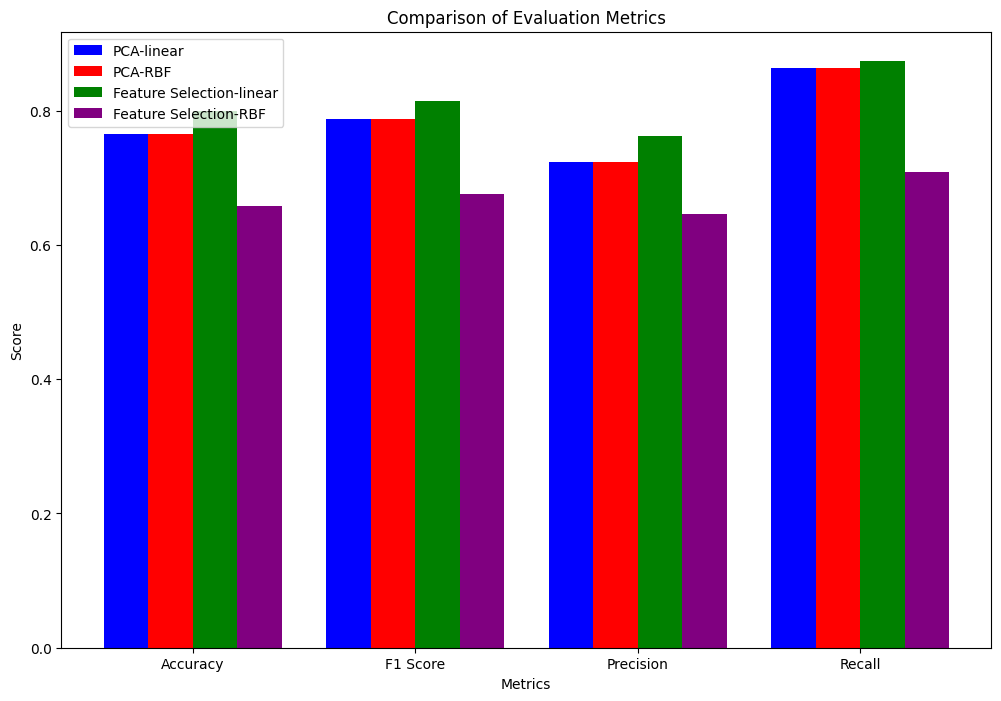

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')  # Change the file path as needed

# Selected attributes for feature selection
selected_attributes = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Prepare the feature matrix (X) and target variable (y) for feature selection
X_fs = df[selected_attributes]
y_fs = df['target']

# Prepare the feature matrix (X) and target variable (y) for PCA
X_pca = df.drop('target', axis=1)
y_pca = df['target']

# Split the data into training and testing sets for feature selection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Split the data into training and testing sets for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Standardize the features for PCA
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train_pca)
X_test_scaled_pca = scaler_pca.transform(X_test_pca)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca_transformed = pca.fit_transform(X_train_scaled_pca)
X_test_pca_transformed = pca.transform(X_test_scaled_pca)

# Train the linear SVM model using PCA transformed features
svm_pca_linear = SVC(kernel='linear')
svm_pca_linear.fit(X_train_pca_transformed, y_train_pca)

# Train the RBF SVM model using PCA transformed features
svm_pca_rbf = SVC(kernel='rbf')
svm_pca_rbf.fit(X_train_pca_transformed, y_train_pca)

# Train the linear SVM model using selected attributes
svm_fs_linear = SVC(kernel='linear')
svm_fs_linear.fit(X_train_fs, y_train_fs)

# Train the RBF SVM model using selected attributes
svm_fs_rbf = SVC(kernel='rbf')
svm_fs_rbf.fit(X_train_fs, y_train_fs)

# Make predictions on the test data for PCA-linear
y_pred_pca_linear = svm_pca_linear.predict(X_test_pca_transformed)

# Make predictions on the test data for PCA-RBF
y_pred_pca_rbf = svm_pca_rbf.predict(X_test_pca_transformed)

# Make predictions on the test data for feature selection-linear
y_pred_fs_linear = svm_fs_linear.predict(X_test_fs)

# Make predictions on the test data for feature selection-RBF
y_pred_fs_rbf = svm_fs_rbf.predict(X_test_fs)

# Calculate evaluation metrics for PCA-linear model
accuracy_pca_linear = accuracy_score(y_test_pca, y_pred_pca_linear)
f1_pca_linear = f1_score(y_test_pca, y_pred_pca_linear)
precision_pca_linear = precision_score(y_test_pca, y_pred_pca_linear)
recall_pca_linear = recall_score(y_test_pca, y_pred_pca_linear)

# Calculate evaluation metrics for PCA-RBF model
accuracy_pca_rbf = accuracy_score(y_test_pca, y_pred_pca_rbf)
f1_pca_rbf = f1_score(y_test_pca, y_pred_pca_rbf)
precision_pca_rbf = precision_score(y_test_pca, y_pred_pca_rbf)
recall_pca_rbf = recall_score(y_test_pca, y_pred_pca_rbf)

# Calculate evaluation metrics for feature selection-linear model
accuracy_fs_linear = accuracy_score(y_test_fs, y_pred_fs_linear)
f1_fs_linear = f1_score(y_test_fs, y_pred_fs_linear)
precision_fs_linear = precision_score(y_test_fs, y_pred_fs_linear)
recall_fs_linear = recall_score(y_test_fs, y_pred_fs_linear)

# Calculate evaluation metrics for feature selection-RBF model
accuracy_fs_rbf = accuracy_score(y_test_fs, y_pred_fs_rbf)
f1_fs_rbf = f1_score(y_test_fs, y_pred_fs_rbf)
precision_fs_rbf = precision_score(y_test_fs, y_pred_fs_rbf)
recall_fs_rbf = recall_score(y_test_fs, y_pred_fs_rbf)

# Plot the comparison of evaluation metrics
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
pca_linear_scores = [accuracy_pca_linear, f1_pca_linear, precision_pca_linear, recall_pca_linear]
pca_rbf_scores = [accuracy_pca_rbf, f1_pca_rbf, precision_pca_rbf, recall_pca_rbf]
fs_linear_scores = [accuracy_fs_linear, f1_fs_linear, precision_fs_linear, recall_fs_linear]
fs_rbf_scores = [accuracy_fs_rbf, f1_fs_rbf, precision_fs_rbf, recall_fs_rbf]

# Plot the comparison
plt.figure(figsize=(12, 8))
bar_width = 0.2
x = range(len(metrics))

# Plot PCA-linear scores
plt.bar(x, pca_linear_scores, width=bar_width, label='PCA-linear', color='blue')

# Plot PCA-RBF scores
plt.bar([i + bar_width for i in x], pca_rbf_scores, width=bar_width, label='PCA-RBF', color='red')

# Plot Feature Selection-linear scores
plt.bar([i + 2 * bar_width for i in x], fs_linear_scores, width=bar_width, label='Feature Selection-linear', color='green')

# Plot Feature Selection-RBF scores
plt.bar([i + 3 * bar_width for i in x], fs_rbf_scores, width=bar_width, label='Feature Selection-RBF', color='purple')

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.xticks([i + bar_width * 1.5 for i in x], metrics)
plt.legend()
plt.show()


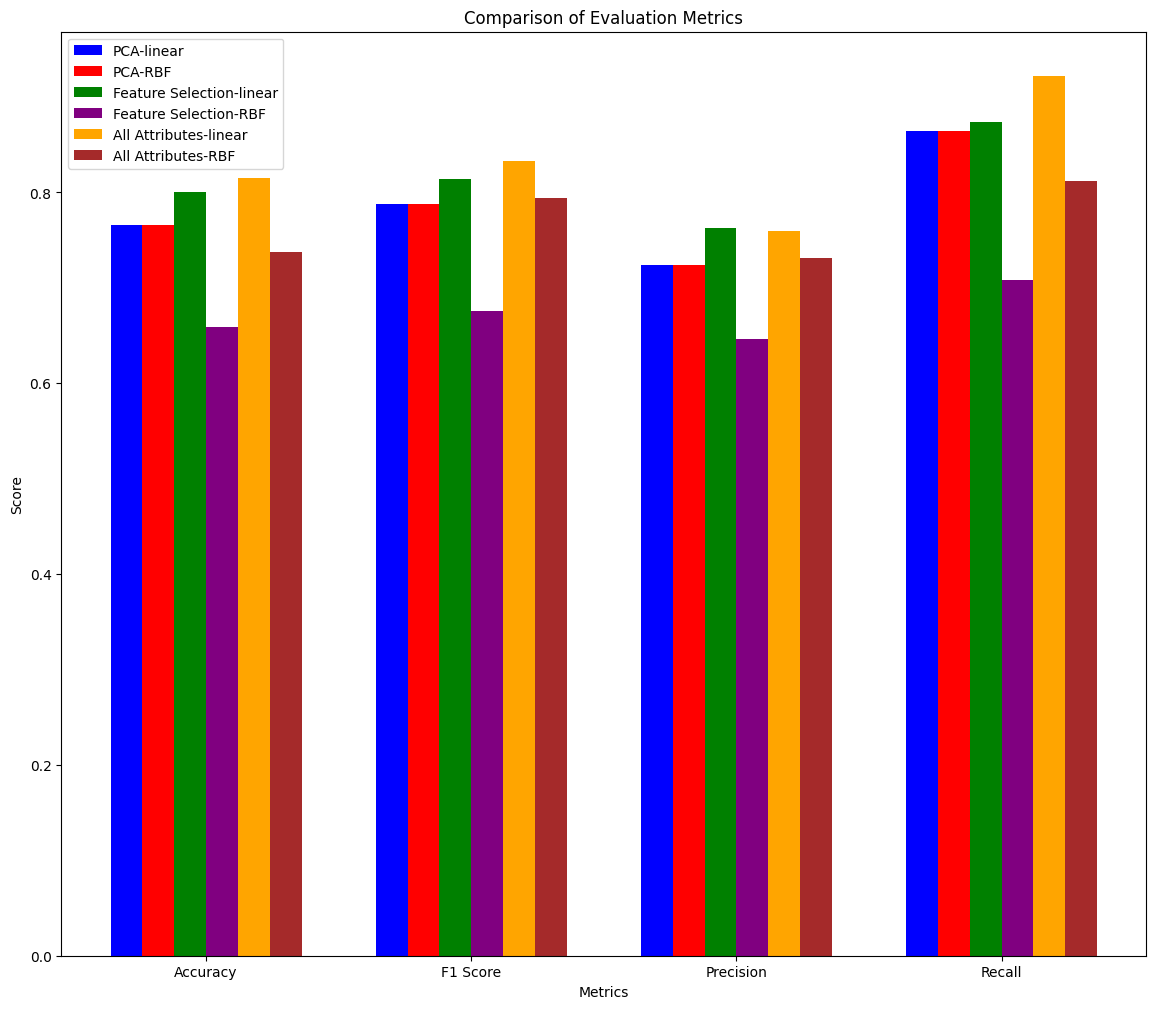

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')  # Change the file path as needed

# Prepare the feature matrix (X) and target variable (y)
X_all = df.drop('target', axis=1)
y_all = df['target']

# Prepare the feature matrix (X) and target variable (y) for feature selection
selected_attributes = ['cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X_fs = df[selected_attributes]
y_fs = df['target']

# Prepare the feature matrix (X) and target variable (y) for PCA
X_pca = df.drop('target', axis=1)
y_pca = df['target']

# Split the data into training and testing sets for all attributes
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Split the data into training and testing sets for feature selection
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

# Split the data into training and testing sets for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Standardize the features for PCA
scaler_pca = StandardScaler()
X_train_scaled_pca = scaler_pca.fit_transform(X_train_pca)
X_test_scaled_pca = scaler_pca.transform(X_test_pca)

# Standardize the features for all attributes
scaler_all = StandardScaler()
X_train_scaled_all = scaler_all.fit_transform(X_train_all)
X_test_scaled_all = scaler_all.transform(X_test_all)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Choose the number of components
X_train_pca_transformed = pca.fit_transform(X_train_scaled_pca)
X_test_pca_transformed = pca.transform(X_test_scaled_pca)

# Train the linear SVM model using PCA transformed features
svm_pca_linear = SVC(kernel='linear')
svm_pca_linear.fit(X_train_pca_transformed, y_train_pca)

# Train the RBF SVM model using PCA transformed features
svm_pca_rbf = SVC(kernel='rbf')
svm_pca_rbf.fit(X_train_pca_transformed, y_train_pca)

# Train the linear SVM model using selected attributes
svm_fs_linear = SVC(kernel='linear')
svm_fs_linear.fit(X_train_fs, y_train_fs)

# Train the RBF SVM model using selected attributes
svm_fs_rbf = SVC(kernel='rbf')
svm_fs_rbf.fit(X_train_fs, y_train_fs)

# Train the linear SVM model using all attributes
svm_all_linear = SVC(kernel='linear')
svm_all_linear.fit(X_train_scaled_all, y_train_all)

# Train the RBF SVM model using all attributes
svm_all_rbf = SVC(kernel='rbf')
svm_all_rbf.fit(X_train_scaled_all, y_train_all)

# Make predictions on the test data for PCA-linear
y_pred_pca_linear = svm_pca_linear.predict(X_test_pca_transformed)

# Make predictions on the test data for PCA-RBF
y_pred_pca_rbf = svm_pca_rbf.predict(X_test_pca_transformed)

# Make predictions on the test data for feature selection-linear
y_pred_fs_linear = svm_fs_linear.predict(X_test_fs)

# Make predictions on the test data for feature selection-RBF
y_pred_fs_rbf = svm_fs_rbf.predict(X_test_fs)

# Make predictions on the test data for all attributes-linear
y_pred_all_linear = svm_all_linear.predict(X_test_scaled_all)

# Make predictions on the test data for all attributes-RBF
y_pred_all_rbf = svm_all_rbf.predict(X_test_scaled_all)

# Calculate evaluation metrics for PCA-linear model
accuracy_pca_linear = accuracy_score(y_test_pca, y_pred_pca_linear)
f1_pca_linear = f1_score(y_test_pca, y_pred_pca_linear)
precision_pca_linear = precision_score(y_test_pca, y_pred_pca_linear)
recall_pca_linear = recall_score(y_test_pca, y_pred_pca_linear)

# Calculate evaluation metrics for PCA-RBF model
accuracy_pca_rbf = accuracy_score(y_test_pca, y_pred_pca_rbf)
f1_pca_rbf = f1_score(y_test_pca, y_pred_pca_rbf)
precision_pca_rbf = precision_score(y_test_pca, y_pred_pca_rbf)
recall_pca_rbf = recall_score(y_test_pca, y_pred_pca_rbf)

# Calculate evaluation metrics for feature selection-linear model
accuracy_fs_linear = accuracy_score(y_test_fs, y_pred_fs_linear)
f1_fs_linear = f1_score(y_test_fs, y_pred_fs_linear)
precision_fs_linear = precision_score(y_test_fs, y_pred_fs_linear)
recall_fs_linear = recall_score(y_test_fs, y_pred_fs_linear)

# Calculate evaluation metrics for feature selection-RBF model
accuracy_fs_rbf = accuracy_score(y_test_fs, y_pred_fs_rbf)
f1_fs_rbf = f1_score(y_test_fs, y_pred_fs_rbf)
precision_fs_rbf = precision_score(y_test_fs, y_pred_fs_rbf)
recall_fs_rbf = recall_score(y_test_fs, y_pred_fs_rbf)

# Calculate evaluation metrics for all attributes-linear model
accuracy_all_linear = accuracy_score(y_test_all, y_pred_all_linear)
f1_all_linear = f1_score(y_test_all, y_pred_all_linear)
precision_all_linear = precision_score(y_test_all, y_pred_all_linear)
recall_all_linear = recall_score(y_test_all, y_pred_all_linear)

# Calculate evaluation metrics for all attributes-RBF model
accuracy_all_rbf = accuracy_score(y_test_all, y_pred_all_rbf)
f1_all_rbf = f1_score(y_test_all, y_pred_all_rbf)
precision_all_rbf = precision_score(y_test_all, y_pred_all_rbf)
recall_all_rbf = recall_score(y_test_all, y_pred_all_rbf)

# Plot the comparison of evaluation metrics
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
pca_linear_scores = [accuracy_pca_linear, f1_pca_linear, precision_pca_linear, recall_pca_linear]
pca_rbf_scores = [accuracy_pca_rbf, f1_pca_rbf, precision_pca_rbf, recall_pca_rbf]
fs_linear_scores = [accuracy_fs_linear, f1_fs_linear, precision_fs_linear, recall_fs_linear]
fs_rbf_scores = [accuracy_fs_rbf, f1_fs_rbf, precision_fs_rbf, recall_fs_rbf]
all_linear_scores = [accuracy_all_linear, f1_all_linear, precision_all_linear, recall_all_linear]
all_rbf_scores = [accuracy_all_rbf, f1_all_rbf, precision_all_rbf, recall_all_rbf]

# Plot the comparison
plt.figure(figsize=(14, 12))
bar_width = 0.12
x = range(len(metrics))

# Plot PCA-linear scores
plt.bar(x, pca_linear_scores, width=bar_width, label='PCA-linear', color='blue')

# Plot PCA-RBF scores
plt.bar([i + bar_width for i in x], pca_rbf_scores, width=bar_width, label='PCA-RBF', color='red')

# Plot Feature Selection-linear scores
plt.bar([i + 2 * bar_width for i in x], fs_linear_scores, width=bar_width, label='Feature Selection-linear', color='green')

# Plot Feature Selection-RBF scores
plt.bar([i + 3 * bar_width for i in x], fs_rbf_scores, width=bar_width, label='Feature Selection-RBF', color='purple')

# Plot All Attributes-linear scores
plt.bar([i + 4 * bar_width for i in x], all_linear_scores, width=bar_width, label='All Attributes-linear', color='orange')

# Plot All Attributes-RBF scores
plt.bar([i + 5 * bar_width for i in x], all_rbf_scores, width=bar_width, label='All Attributes-RBF', color='brown')

# Customize the plot
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Evaluation Metrics')
plt.xticks([i + bar_width * 2.5 for i in x], metrics)
plt.legend(loc='upper left')  # Adjust this location as needed
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


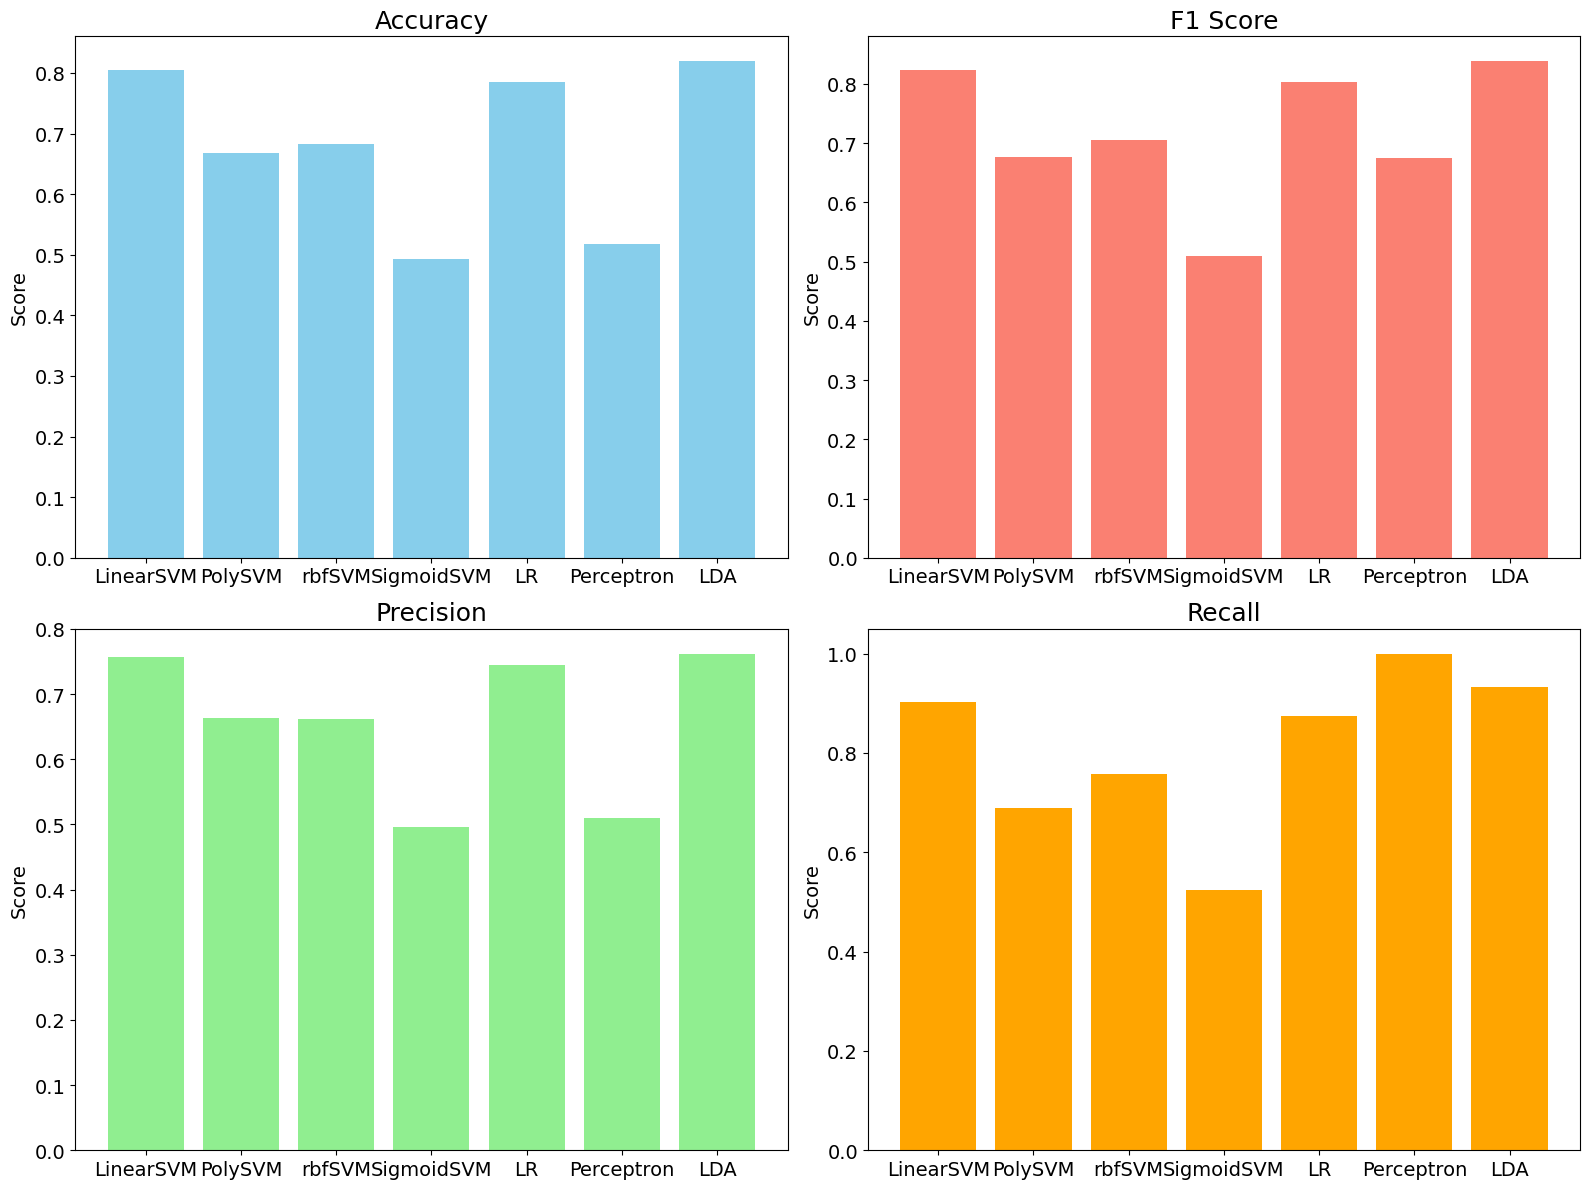

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the dataset from CSV file
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearSVM': SVC(kernel='linear'),
    'PolySVM': SVC(kernel='poly'),
    'rbfSVM': SVC(kernel='rbf'),
    'SigmoidSVM': SVC(kernel='sigmoid'),
    'LR': LogisticRegression(),
    'Perceptron': Perceptron(),
    'LDA': LinearDiscriminantAnalysis()
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
f1_scores = {}
precision_scores = {}
recall_scores = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = f1_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred)
    recall_scores[name] = recall_score(y_test, y_pred)

# Plot the evaluation metrics for each model
plt.figure(figsize=(16, 12))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Accuracy', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# F1 Score
plt.subplot(2, 2, 2)
plt.bar(f1_scores.keys(), f1_scores.values(), color='salmon')
plt.title('F1 Score', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Precision
plt.subplot(2, 2, 3)
plt.bar(precision_scores.keys(), precision_scores.values(), color='lightgreen')
plt.title('Precision', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Recall
plt.subplot(2, 2, 4)
plt.bar(recall_scores.keys(), recall_scores.values(), color='orange')
plt.title('Recall', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()
